In [3]:
import os
import fnmatch
import matplotlib.pyplot as plt # after importting matplotlib, mayavi can not set api to 2: first run mayavi!!!!
from latexify import latexify
import numpy as np

# Use Mcstas-script (not used)
**1st** read \*.instr, 

**2nd** write to python file, 

**3rd** copy py code to here and run

In [19]:
from mcstasscript.interface import functions
my_configurator = functions.Configurator()
my_configurator.set_mcrun_path(r"C:\mcstas-2.6.1\bin/")
my_configurator.set_mcstas_path(r"C:\mcstas-2.6.1\lib/")
from mcstasscript.interface import instr, plotter, functions, reader

ModuleNotFoundError: No module named 'mcstasscript'

In [ ]:
Reader = reader.McStas_file(r"D:\5_Instrument\Mira_Bender\pol_Bender.instr")
Reader.write_python_file(r"D:\5_Instrument\Mira_Bender\pol_Bender_generated.py")

In [ ]:
"""
This McStasScript file was generated from a McStas
instrument file. It is advised to check the content
to ensure it is as expected.
"""
from mcstasscript.interface import instr, plotter, functions

Test_Pol_Bender = instr.McStas_instr("Test_Pol_Bender_generated")
Test_Pol_Bender.add_parameter("double", "BENDERLENGTH", value=0.06)
Test_Pol_Bender.add_parameter("double", "BENDERRADIUS", value=3.0)
Test_Pol_Bender.add_parameter("double", "BENDER_Z", value=0.4)
Test_Pol_Bender.add_parameter("int", "ENDOPTION", value=0)
Test_Pol_Bender.add_parameter("int", "NSLITS", value=461)
Test_Pol_Bender.add_parameter("double", "WSPACER", value=1e-05)
Test_Pol_Bender.add_parameter("int", "DRAWOPTION", value=1)
Test_Pol_Bender.append_declare("  double calcAlpha(double length, double radius) {")
Test_Pol_Bender.append_declare("    // calculate angle of arm after curved guide")
Test_Pol_Bender.append_declare("    return RAD2DEG * length/radius;")
Test_Pol_Bender.append_declare("  }")
Test_Pol_Bender.append_declare("")
Test_Pol_Bender.append_declare("  double calcX(double length, double radius) {")
Test_Pol_Bender.append_declare("    // calculate position and angle of arm after curved guide (should be cos(alpha/2)?????? Xu)")
Test_Pol_Bender.append_declare("    double alpha = DEG2RAD * calcAlpha(length, radius);")
Test_Pol_Bender.append_declare("    return radius*(1.0-cos(alpha));")
Test_Pol_Bender.append_declare("  }")
Test_Pol_Bender.append_declare("")
Test_Pol_Bender.append_declare("  double calcZ(double length, double radius) {")
Test_Pol_Bender.append_declare("    // calculate position and angle of arm after curved guide")
Test_Pol_Bender.append_declare("    double alpha = DEG2RAD * calcAlpha(length, radius);")
Test_Pol_Bender.append_declare("    return radius*sin(alpha);")
Test_Pol_Bender.append_declare("  }")
Test_Pol_Bender.append_declare("")

Origin = Test_Pol_Bender.add_component("Origin", "Progress_bar")
Origin.set_AT(['0', '0', '0'], RELATIVE="ABSOLUTE")

source = Test_Pol_Bender.add_component("source", "Source_simple")
source.radius = 0.15
source.dist = 1000
source.focus_xw = 0.08
source.focus_yh = 0.08
source.lambda0 = 4
source.dlambda = 2
source.flux = 1
source.set_AT(['0', ' 0', ' 0'], RELATIVE="Origin")

psdStart = Test_Pol_Bender.add_component("psdStart", "PSD_monitor")
psdStart.nx = 40
psdStart.ny = 40
psdStart.filename = "\"psdSource.dat\""
psdStart.xwidth = 0.20
psdStart.yheight = 0.20
psdStart.set_AT(['0', ' 0', ' 0.1'], RELATIVE="Origin")

slit = Test_Pol_Bender.add_component("slit", "Slit")
slit.xwidth = 0.06
slit.yheight = 0.12
slit.set_AT(['0', ' 0', ' 0.3001'], RELATIVE="Origin")

lamSlit = Test_Pol_Bender.add_component("lamSlit", "L_monitor")
lamSlit.nL = 30
lamSlit.filename = "\"lambdaStart.dat\""
lamSlit.xwidth = 0.1
lamSlit.yheight = 0.2
lamSlit.Lmin = 2
lamSlit.Lmax = 6
lamSlit.set_AT(['0', ' 0', ' 0.3001'], RELATIVE="Origin")

psdSlit = Test_Pol_Bender.add_component("psdSlit", "PSD_monitor")
psdSlit.nx = 40
psdSlit.ny = 40
psdSlit.filename = "\"psdStart.dat\""
psdSlit.xwidth = 0.20
psdSlit.yheight = 0.2
psdSlit.set_AT(['0', ' 0', ' 0.3001'], RELATIVE="Origin")

bender = Test_Pol_Bender.add_component("bender", "Pol_bender")
bender.rLeftUpPar = "{0.99, 0.0217, 2.6, 3.6, 0.0001}"
bender.rLeftDownPar = "{0.99, 0.0130, 0.0, 1.0, 0.0001}"
bender.xwidth = 0.06
bender.yheight = 0.12
bender.length = "BENDERLENGTH"
bender.radius = "BENDERRADIUS"
bender.nslit = "NSLITS"
bender.d = "WSPACER"
bender.endFlat = "ENDOPTION"
bender.drawOption = "DRAWOPTION"
bender.set_AT(['0', ' 0', ' BENDER_Z'], RELATIVE="Origin")

armlambdaStop = Test_Pol_Bender.add_component("armlambdaStop", "Arm")
armlambdaStop.set_AT(['calcX(BENDERLENGTH, BENDERRADIUS)', ' 0', ' calcZ(BENDERLENGTH, BENDERRADIUS)+BENDER_Z'], RELATIVE="Origin")
armlambdaStop.set_ROTATED(['0', ' calcAlpha(BENDERLENGTH, BENDERRADIUS)', ' 0'], RELATIVE="Origin")

meanpollambdaMonitorY = Test_Pol_Bender.add_component("meanpollambdaMonitorY", "MeanPolLambda_monitor")
meanpollambdaMonitorY.xwidth = 0.1
meanpollambdaMonitorY.yheight = 0.2
meanpollambdaMonitorY.nL = 81
meanpollambdaMonitorY.filename = "\"meanpollambdaMonY.dat\""
meanpollambdaMonitorY.my = 1
meanpollambdaMonitorY.Lmin = 2.0
meanpollambdaMonitorY.Lmax = 6.0
meanpollambdaMonitorY.set_AT(['0', ' 0', ' 2 - BENDER_Z - BENDERLENGTH'], RELATIVE="PREVIOUS")

lamBender = Test_Pol_Bender.add_component("lamBender", "L_monitor")
lamBender.nL = 81
lamBender.filename = "\"lambdaBender.dat\""
lamBender.xwidth = 0.1
lamBender.yheight = 0.2
lamBender.Lmin = 2
lamBender.Lmax = 6
lamBender.set_AT(['0', ' 0', ' 0.0001'], RELATIVE="PREVIOUS")

psdBender = Test_Pol_Bender.add_component("psdBender", "PSD_monitor")
psdBender.nx = 40
psdBender.ny = 40
psdBender.filename = "\"psdBender.dat\""
psdBender.xwidth = 0.20
psdBender.yheight = 0.20
psdBender.set_AT(['0', ' 0', ' 0.0001'], RELATIVE="PREVIOUS")

pollambdaMonitorY = Test_Pol_Bender.add_component("pollambdaMonitorY", "PolLambda_monitor")
pollambdaMonitorY.xwidth = 0.1
pollambdaMonitorY.yheight = 0.2
pollambdaMonitorY.nL = 81
pollambdaMonitorY.npol = 81
pollambdaMonitorY.filename = "\"pollambdaMonY.dat\""
pollambdaMonitorY.my = 1
pollambdaMonitorY.Lmin = 2.0
pollambdaMonitorY.Lmax = 6.0
pollambdaMonitorY.set_AT(['0', ' 0', ' 0.0001'], RELATIVE="PREVIOUS")


In [ ]:
data = Test_Pol_Bender.run_full_instrument(foldername="D:/5_Instrument\Mira_Bender\mcstas_script/1")

D:/5_Instrument\Mira_Bender\mcrun -c -n 1000000 -d D:/5_Instrument\Mira_Bender\mcstas_script/1  Test_Pol_Bender_generated.instr BENDERLENGTH=0.06 BENDERRADIUS=3.0 BENDER_Z=0.4 ENDOPTION=0 NSLITS=461 WSPACER=1e-05 DRAWOPTION=1
'D:/5_Instrument\Mira_Bender\mcrun' is not recognized as an internal or external command,
operable program or batch file.




In [ ]:
#plot = plotter.make_sub_plot(data) # Making subplot of our monitors

In [ ]:
print(data)

[
McStasData: psdStart type: 2D  I:1.0248e-005 E:1.36178e-008 N:566329, 
McStasData: lamSlit type: 1D  I:1.84904e-006 E:5.78442e-009 N:102182, 
McStasData: psdSlit type: 2D  I:1.84904e-006 E:5.78442e-009 N:102182, 
McStasData: meanpollambdaMonitorY type: 1D  I:52.21 E:0.118699 N:94356, 
McStasData: lamBender type: 1D  I:1.01674e-006 E:3.49237e-009 N:94356, 
McStasData: psdBender type: 2D  I:1.01674e-006 E:3.49237e-009 N:94356, 
McStasData: pollambdaMonitorY type: 2D  I:1.01674e-006 E:3.49237e-009 N:94356]


# Use subprocess directly

In [3]:
# Will wait: asking for used default parameters? Better to write the defaust params in the command
# https://github.com/PaNOSC-ViNYL/McStasScript/blob/master/mcstasscript/helper/managed_mcrun.py
import os, subprocess
#process = subprocess.run(r"C:\mcstas-2.6.1\bin/mcrun -c D:\5_Instrument\Mira_Bender\pol_Bender.instr", env=r"C:\mcstas-2.6.1\bin/", shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE, universal_newlines=True)
my_env = os.environ.copy()
#my_env["PATH"] = my_env["PATH"] + r";C:\mcstas-2.6.1\bin"
my_env["PATH"] = my_env["PATH"] + r";C:\mcstas-2.7.1\bin"

In [ ]:
# Using pol_Bender
os.chdir('D:/5_Instrument\Mira_Bender/')# will compile in this directory
# process = subprocess.run(
#     r"mcrun -c pol_Bender.instr -d .\test BENDERLENGTH=0.06 BENDERRADIUS=3.0 BENDER_Z=0.4 ENDOPTION=0 NSLITS=461 WSPACER=1e-05 DRAWOPTION=1", 
#                          env=my_env, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE, universal_newlines=True)

process = subprocess.run(r"mcrun -c Bender_calc_R_col_div.instr -N11 BENDERLENGTH=0.03,0.13 \
                         BENDER_Z=0.4 ENDOPTION=0 NSLITS=461 WSPACER=1e-05 DRAWOPTION=1", 
                         env=my_env, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE, universal_newlines=True)

print(process.stderr)
print(process.stdout)

C:\mcstas-2.6.1\lib\tools\Python\mcrun\mccode.py:200: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if val is not None and val is not '':
INFO: No output directory specified (--dir)
INFO: Using directory: "Bender_calc_R_col_div_20201218_100547"
INFO: Regenerating c-file: Bender_calc_R_col_div.c
CFLAGS=
INFO: Recompiling: Bender_calc_R_col_div.exe
mccode-r.c: In function 'sighandler':
mccode-r.c:3711:64: warning: implicit declaration of function 'getpid' [-Wimplicit-function-declaration]
INFO: ===
INFO: Running Scanner, result file is "Bender_calc_R_col_div_20201218_100547/mccode.dat"
INFO: BENDERLENGTH: 0.030000
INFO: BENDERLENGTH: 0.040000
INFO: BENDERLENGTH: 0.050000
INFO: BENDERLENGTH: 0.060000
INFO: BENDERLENGTH: 0.070000
INFO: BENDERLENGTH: 0.080000
INFO: BENDERLENGTH: 0.090000
INFO: BENDERLENGTH: 0.100000
INFO: BENDERLENGTH: 0.110000
INFO: BENDERLENGTH: 0.120000
INFO: BENDERLENGTH: 0.130000
INFO: Placing instr file copy Bender_calc_R_col_div.instr in dataset Bender

In [ ]:
# using bender from OA
os.chdir(r'D:\5_Instrument\Mira_Bender_ref_tran/')# will compile in this directory
process = subprocess.run(r"mcrun -c 0_Pol_Bender_calc_R_col_div_simpler.instr -N11 BENDERLENGTH=0.03,0.13 \
                         BENDER_PCS=100 BENDER_Z=0.4 \
                         Col_L=0.25 \
                         ENDOPTION=0 DRAWOPTION=1", 
                         env=my_env, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE, 
                         universal_newlines=True)

print(process.stderr)
print(process.stdout)

C:\mcstas-2.6.1\lib\tools\Python\mcrun\mccode.py:200: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if val is not None and val is not '':
INFO: No output directory specified (--dir)
INFO: Using directory: "0_Pol_Bender_calc_R_col_div_simpler_20210115_222250"
INFO: Regenerating c-file: 0_Pol_Bender_calc_R_col_div_simpler.c
  reflectUP={ 0.99 , 0.0217 , 2.6 , 3.6 , 0.0001 }
  reflectDW={ 0.99 , 0.0130 , 0.0 , 0.0 , 0.0001 }
Info:    Defining iterative JUMP from arm_piece_out to a_polarizer_start
CFLAGS=
INFO: Recompiling: 0_Pol_Bender_calc_R_col_div_simpler.exe
mccode-r.c: In function 'sighandler':
mccode-r.c:3711:64: warning: implicit declaration of function 'getpid' [-Wimplicit-function-declaration]
Bender_polarisator_v1_1_2020_xu_Gd.comp: At top level:
Bender_polarisator_v1_1_2020_xu_Gd.comp:93:19: warning: ISO C99 requires whitespace after the macro name
     if (a_mright  >= 0) aVars->M[2] =a_mright ;
                   ^
INFO: ===
INFO: Running Scanner, result file i

In [ ]:
# using bender from OA with ColDivC
os.chdir(r'D:\5_Instrument\Mira_Bender_ref_tran/')# will compile in this directory
process = subprocess.run(r"mcrun -c 0_Pol_Bender_calc_R_col_div_simpler.instr -N11 BENDERLENGTH=0.03,0.13 \
                         BENDER_PCS=100 BENDER_Z=0.4 \
                         Col_L=0.25 ColDivC=0.25 \
                         ENDOPTION=0 DRAWOPTION=1", 
                         env=my_env, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE, 
                         universal_newlines=True)
# why setting ColDivC=0.25 different from the default is not working?
print(process.stderr)
print(process.stdout)

INFO: No output directory specified (--dir)
INFO: Using directory: "0_Pol_Bender_calc_R_col_div_simpler_20210128_132612"
INFO: Regenerating c-file: 0_Pol_Bender_calc_R_col_div_simpler.c
  reflectUP={ 0.99 , 0.0217 , 2.6 , 3.6 , 0.001 }
  reflectDW={ 0.99 , 0.0217 , 0.0 , 0.33 , 0.001 }
Info:    Defining iterative JUMP from arm_piece_out to a_polarizer_start
CFLAGS=
INFO: Recompiling: 0_Pol_Bender_calc_R_col_div_simpler.exe
mccode-r.c: In function 'sighandler':
mccode-r.c:3711:64: warning: implicit declaration of function 'getpid' [-Wimplicit-function-declaration]
Bender_polarisator_v1_1_2020_xu_Gd.comp: At top level:
Bender_polarisator_v1_1_2020_xu_Gd.comp:93:19: warning: ISO C99 requires whitespace after the macro name
     if (a_mright  >= 0) aVars->M[2] =a_mright ;
                   ^
INFO: ===
INFO: Running Scanner, result file is "0_Pol_Bender_calc_R_col_div_simpler_20210128_132612/mccode.dat"
INFO: BENDERLENGTH: 0.030000
INFO: BENDERLENGTH: 0.040000
INFO: BENDERLENGTH: 0.050000


In [ ]:
import time
os.chdir(r'D:\5_Instrument\Mira_Bender_ref_tran/')# will compile in this directory
tic = time.time()
process = subprocess.run(r"mcrun -c 0_Pol_Bender_calc_R_col_div_simpler_divSClam.instr -n 500000 -N11 BENDERLENGTH=0.03,0.13 \
                         BENDER_PCS=100 BENDER_Z=0.4 \
                         Col_L=0.25 ColDivC=0.25 \
                         ENDOPTION=0 DRAWOPTION=1", 
                         env=my_env, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE, 
                         universal_newlines=True)
# why setting ColDivC=0.25 different from the default is not working?
toc = time.time()
elapse = toc - tic

print(process.stderr)
print(process.stdout)

INFO: No output directory specified (--dir)
INFO: Using directory: "0_Pol_Bender_calc_R_col_div_simpler_divSClam_20210128_155940"
INFO: Regenerating c-file: 0_Pol_Bender_calc_R_col_div_simpler_divSClam.c
  reflectUP={ 0.99 , 0.0217 , 2.6 , 3.6 , 0.001 }
  reflectDW={ 0.99 , 0.0217 , 0.0 , 0.33 , 0.001 }
Info:    Defining iterative JUMP from arm_piece_out to a_polarizer_start
CFLAGS=
INFO: Recompiling: 0_Pol_Bender_calc_R_col_div_simpler_divSClam.exe
mccode-r.c: In function 'sighandler':
mccode-r.c:3711:64: warning: implicit declaration of function 'getpid' [-Wimplicit-function-declaration]
Bender_polarisator_v1_1_2020_xu_Gd.comp: At top level:
Bender_polarisator_v1_1_2020_xu_Gd.comp:93:19: warning: ISO C99 requires whitespace after the macro name
     if (a_mright  >= 0) aVars->M[2] =a_mright ;
                   ^
INFO: ===
INFO: Running Scanner, result file is "0_Pol_Bender_calc_R_col_div_simpler_divSClam_20210128_155940/mccode.dat"
INFO: BENDERLENGTH: 0.030000
INFO: BENDERLENGTH: 0.

In [ ]:
import time

tic = time.time()

# Using line break, multiline triple quote: not working
cmd = r"mcrun -c 0_Pol_Bender_calc_R_col_div_simpler_sample.instr " + \
      r"-d D:\5_Instrument\Mira_Bender_ref_tran\0_Pol_Bender_calc_R_col_div_simpler_sample_div2p0 "+ \
      r"-n 100000 -N11 BENDERLENGTH=0.03,0.13 " + \
      r"BENDER_PCS=100  BENDER_Z=0.4  Col_L=0.25  ColDivC=0.25  hdiv=0.1 vdiv=0.1  ENDOPTION=0  DRAWOPTION=1"

# cmd = r"""mcrun -c 0_Pol_Bender_calc_R_col_div_simpler_sample.instr 
#         -d D:\5_Instrument\Mira_Bender_ref_tran\0_Pol_Bender_calc_R_col_div_simpler_sample_test 
#         -n 1000 -N11 BENDERLENGTH=0.03,0.13 
#         BENDER_PCS=100  BENDER_Z=0.4  Col_L=0.25  ColDivC=0.25  hdiv=2.0 vdiv=1.0  ENDOPTION=0  DRAWOPTION=1
#        """

process = subprocess.run(cmd, env=my_env, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE, universal_newlines=True, cwd=r'D:\5_Instrument\Mira_Bender_ref_tran/')

toc = time.time()
elapse = toc - tic
print(elapse)

print(process.stderr)
print(process.stdout)

416.3320508003235
INFO: Using directory: "D:\5_Instrument\Mira_Bender_ref_tran\0_Pol_Bender_calc_R_col_div_simpler_sample_div0p1_absorb"
INFO: Regenerating c-file: 0_Pol_Bender_calc_R_col_div_simpler_sample.c
  reflectUP={ 0.99 , 0.0217 , 2.6 , 3.6 , 0.001 }
  reflectDW={ 0.99 , 0.0217 , 0.0 , 0.33 , 0.001 }
Info:    Defining iterative JUMP from arm_piece_out to a_polarizer_start
CFLAGS=
INFO: Recompiling: 0_Pol_Bender_calc_R_col_div_simpler_sample.exe
mccode-r.c: In function 'sighandler':
mccode-r.c:3711:64: warning: implicit declaration of function 'getpid' [-Wimplicit-function-declaration]
Bender_polarisator_v1_1_2020_xu_Gd.comp: At top level:
Bender_polarisator_v1_1_2020_xu_Gd.comp:93:19: warning: ISO C99 requires whitespace after the macro name
     if (a_mright  >= 0) aVars->M[2] =a_mright ;
                   ^
INFO: ===
INFO: Running Scanner, result file is "D:\5_Instrument\Mira_Bender_ref_tran\0_Pol_Bender_calc_R_col_div_simpler_sample_div0p1_absorb/mccode.dat"
INFO: BENDERLEN

# Parallel running multiple tasks

## import and def

In [3]:
from joblib import Parallel, delayed
import multiprocessing, subprocess, time
multiprocessing.cpu_count()
import numpy as np
from shutil import copyfile
import time
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

# Will wait: asking for used default parameters? Better to write the defaust params in the command
# https://github.com/PaNOSC-ViNYL/McStasScript/blob/master/mcstasscript/helper/managed_mcrun.py
import os, subprocess
#process = subprocess.run(r"C:\mcstas-2.6.1\bin/mcrun -c D:\5_Instrument\Mira_Bender\pol_Bender.instr", env=r"C:\mcstas-2.6.1\bin/", shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE, universal_newlines=True)
my_env = os.environ.copy()
#my_env["PATH"] = my_env["PATH"] + r";C:\mcstas-2.6.1\bin"
my_env["PATH"] = my_env["PATH"] + r";C:\mcstas-2.7\bin"

cwd=r'D:\5_Instrument\Mira_Bender\Mira_Bender_coldS/'

def para_tasks(cmd, cwd=r'D:\5_Instrument\Mira_Bender\Mira_Bender_coldS/'):
    #os.chdir(r'D:\5_Instrument\Mira_Bender_ref_tran/')# will compile in this directory
    process = subprocess.run(cmd, 
                         env=my_env, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE, 
                         universal_newlines=True, cwd=cwd)
    return process.stderr, process.stdout

## 0_Pol_Bender_calc_R_col_div_simpler

In [ ]:
cmds = [r"mcrun -c 0_Pol_Bender_calc_R_col_div_simpler.instr -d D:\5_Instrument\Mira_Bender_ref_tran\test1 -n 1000 -N11 BENDERLENGTH=0.03,0.13 \
                         BENDER_PCS=100  BENDER_Z=0.4  Col_L=0.25  ColDivC=0.25  hdiv=0.5  vdiv=0.5  ENDOPTION=0  DRAWOPTION=1 ",
        
        r"mcrun -c 0_Pol_Bender_calc_R_col_div_simpler1.instr -d D:\5_Instrument\Mira_Bender_ref_tran\test2 -n 1000 -N11 BENDERLENGTH=0.03,0.13 \
                         BENDER_PCS=100  BENDER_Z=0.4  Col_L=0.25  ColDivC=0.25  hdiv=0.8  vdiv=0.8  ENDOPTION=0  DRAWOPTION=1"        
       ]


# cmds = [r"mcrun -c 0_Pol_Bender_calc_R_col_div_simpler.instr -d D:\5_Instrument\Mira_Bender_ref_tran\test1 BENDERLENGTH=0.03 \
#                          BENDER_PCS=100 BENDER_Z=0.4 \
#                          Col_L=0.25 ColDivC=0.25 \
#                          ENDOPTION=0 DRAWOPTION=1 hdiv=0.5 vdiv=0.5 ",
#         r"mcrun -c 0_Pol_Bender_calc_R_col_div_simpler.instr -d D:/5_Instrument/Mira_Bender_ref_tran\test2 BENDERLENGTH=0.03 \
#                          BENDER_PCS=100 BENDER_Z=0.4 \
#                          Col_L=0.25 ColDivC=0.3 hdiv=0.8 vdiv=0.8 \
#                          ENDOPTION=0 DRAWOPTION=1"         
#        ]

with Parallel(n_jobs=2, prefer="threads") as parallel:
    output = parallel(delayed(para_tasks)(cmd) for cmd in cmds)
# why setting ColDivC=0.25 different from the default is not working?

In [ ]:
#print(output[0][1])

cmd = r"""mcrun -c 0_Pol_Bender_calc_R_col_div_simpler_sample.instr  
-d D:\5_Instrument\Mira_Bender_ref_tran\0_Pol_Bender_calc_R_col_div_simpler_sample_div2p0_2p0_absorb
-n 100000 -N11 BENDERLENGTH=0.03,0.13 
BENDER_PCS=100  BENDER_Z=0.4  Col_L=0.25  ColDivC=0.25  
hdiv=2.0  vdiv=2.0  absorb=1
ENDOPTION=0  DRAWOPTION=1""".replace('\n',' ')

process = subprocess.run(cmd, env=my_env, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE, universal_newlines=True, cwd=r'D:\5_Instrument\Mira_Bender_ref_tran/')
print(process.stderr)
print(process.stdout)

INFO: Using directory: "D:\5_Instrument\Mira_Bender_ref_tran\0_Pol_Bender_calc_R_col_div_simpler_sample_div2p0_2p0_absorb"
INFO: Regenerating c-file: 0_Pol_Bender_calc_R_col_div_simpler_sample.c
  reflectUP={ 0.99 , 0.0217 , 2.6 , 3.6 , 0.001 }
  reflectDW={ 0.99 , 0.0217 , 0.0 , 0.33 , 0.001 }
Info:    Defining iterative JUMP from arm_piece_out to a_polarizer_start
CFLAGS=
INFO: Recompiling: 0_Pol_Bender_calc_R_col_div_simpler_sample.exe
mccode-r.c: In function 'sighandler':
mccode-r.c:3711:64: warning: implicit declaration of function 'getpid' [-Wimplicit-function-declaration]
Bender_polarisator_v1_1_2020_xu_Gd.comp: At top level:
Bender_polarisator_v1_1_2020_xu_Gd.comp:93:19: warning: ISO C99 requires whitespace after the macro name
     if (a_mright  >= 0) aVars->M[2] =a_mright ;
                   ^
INFO: ===
INFO: Running Scanner, result file is "D:\5_Instrument\Mira_Bender_ref_tran\0_Pol_Bender_calc_R_col_div_simpler_sample_div2p0_2p0_absorb/mccode.dat"
INFO: BENDERLENGTH: 0.030

In [ ]:
cmds = [r"mcrun -c 0_Pol_Bender_calc_R_col_div_simpler_sample.instr  -d D:\5_Instrument\Mira_Bender_ref_tran\0_Pol_Bender_calc_R_col_div_simpler_sample_div2p0_2p0_straight        -n 1000000 -N11 BENDERLENGTH=0.03,0.13 BENDER_PCS=100  BENDER_Z=0.4  Col_L=0.25  ColDivC=0.25  hdiv=2.0  vdiv=2.0  absorb=0 ENDOPTION=0  DRAWOPTION=1",
        
        r"mcrun -c 0_Pol_Bender_calc_R_col_div_simpler_sample1.instr -d D:\5_Instrument\Mira_Bender_ref_tran\0_Pol_Bender_calc_R_col_div_simpler_sample_div2p0_2p0_absorb_straight -n 1000000 -N11 BENDERLENGTH=0.03,0.13 BENDER_PCS=100  BENDER_Z=0.4  Col_L=0.25  ColDivC=0.25  hdiv=2.0  vdiv=2.0  absorb=1 ENDOPTION=0  DRAWOPTION=1",
        
        r"mcrun -c 0_Pol_Bender_calc_R_col_div_simpler_sample2.instr -d D:\5_Instrument\Mira_Bender_ref_tran\0_Pol_Bender_calc_R_col_div_simpler_sample_div2p0_2p0                 -n 500000 -N11 BENDERLENGTH=0.03,0.13 BENDER_PCS=100  BENDER_Z=0.4  Col_L=0.25  ColDivC=0.25  hdiv=2.0  vdiv=2.0  absorb=0 ENDOPTION=0  DRAWOPTION=1",
        
        r"mcrun -c 0_Pol_Bender_calc_R_col_div_simpler_sample3.instr -d D:\5_Instrument\Mira_Bender_ref_tran\0_Pol_Bender_calc_R_col_div_simpler_sample_div2p0_2p0_absorb          -n 500000 -N11 BENDERLENGTH=0.03,0.13 BENDER_PCS=100  BENDER_Z=0.4  Col_L=0.25  ColDivC=0.25  hdiv=2.0  vdiv=2.0  absorb=1 ENDOPTION=0  DRAWOPTION=1" 
       ]
tic = time.time()
with Parallel(n_jobs=2, prefer="threads") as parallel:
    output = parallel(delayed(para_tasks)(cmd) for cmd in cmds[2:4])
toc = time.time()
elapse = toc - tic
print(elapse)

1865.3103849887848


In [ ]:
print(output[0][1])

                      Calculated bender radius of curvature R=  0.864 [m]
Calculated bender angle =  2.187 [degree]
BenderPieceRp                  = 0.021874
BenderPieceRn                  = 0.021874
[Test_Pol_Bender] Initialize

Trace ETA 6.31667 [min] % 2 10 20 30 40 50 60 70 80 90 
Save [Test_Pol_Bender]
Detector: psdSlit_I=0.274107 psdSlit_ERR=0.000274125 psdSlit_N=999875 "psdStart.dat"
Detector: lamBeforeBender_I=0.274107 lamBeforeBender_ERR=0.000274125 lamBeforeBender_N=999875 "lambda_beforeBender.dat"
Detector: div_monitor_beforeBender_I=0.274107 div_monitor_beforeBender_ERR=0.000274125 div_monitor_beforeBender_N=999875 "div_beforeBender.dat"
Detector: Lam_div_beforeBender_I=0.274107 Lam_div_beforeBender_ERR=0.000274125 Lam_div_beforeBender_N=999875 "lambda_hdiv_beforeBender.dat"
Detector: meanpollambdaMonitorY_bender_I=48.2481 meanpollambdaMonitorY_bender_ERR=0.095987 meanpollambdaMonitorY_bender_N=519088 "meanpollambdaMonY_bender.dat"
Detector: Lam_after_Bender_I=0.142304 Lam_

# With code source and mono: reflection bender

In [ ]:
# (don't) run mcstas simulations

path = r'D:\5_Instrument\Mira_Bender\Mira_Bender_coldS/' # path to run "mcrun" cmd

# Bender params
longer = 1.1
Ls = np.linspace(0.03,0.12, num=10, endpoint=True) # bender length
print('Bender lengths to scan:\n', Ls)
Rs = (Ls**2/8/(0.06/461))/longer # bender radius
Ac = Ls/(2*Rs) # critical angle
Ac = np.sqrt(2*0.06/461/Rs)# use this one for calculating Lmabda_c if bender is longer than the exact value for avoiding direct view
#print(Ac, Ac2)
Lc = Ac/(1.73*3.6)*1e3 # critical lambda
Angle = -Ls/Rs*180/3.1415926 # bender arc angle

# Mono params
L=2.16
d=3.355
kis = np.arange(1, 3.2, 0.2)
rho_mv=-1/(2*L*np.pi/(kis*d))
rho_mh=-1/(2*L*kis*d/np.pi)


Bender lengths to scan:
 [0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12]


In [ ]:
# Make three copies of the *.instr file


# Bender
src = r'D:\5_Instrument\Mira_Bender\Mira_Bender_coldS\lapis.instr'
for i in [1,2,3]:
    copyfile(src, src.replace( '.', '{:d}.'.format(i) ) )

# no Bender
src = r'D:\5_Instrument\Mira_Bender\Mira_Bender_coldS\lapis_noBender.instr'
for i in [1,2,3]:
    copyfile(src, src.replace( '.', '{:d}.'.format(i) ) )

## Without absorption

In [ ]:
cmds = [None] * 11
outputs = [None] * 11

n = '1e8'
folder = r'D:\5_Instrument\Mira_Bender\Mira_Bender_coldS\lapis_ki1-3_benderL{}_'+ n

tic = time.time()

for i in [0,1,2]:
    if i<2:
        cmds[i*4+0] = r'mcrun -c lapis.instr  -d {0:} -n {1:} -N11 kI=1,3.2 BENDERLENGTH={2:} BENDER_Z=0.4 absorb=0'.format(folder.format(Ls[i*4+0]).replace('.','p'), n, Ls[i*4+0])
        cmds[i*4+1] = r'mcrun -c lapis1.instr -d {0:} -n {1:} -N11 kI=1,3.2 BENDERLENGTH={2:} BENDER_Z=0.4 absorb=0'.format(folder.format(Ls[i*4+1]).replace('.','p'), n, Ls[i*4+1])
        cmds[i*4+2] = r'mcrun -c lapis2.instr -d {0:} -n {1:} -N11 kI=1,3.2 BENDERLENGTH={2:} BENDER_Z=0.4 absorb=0'.format(folder.format(Ls[i*4+2]).replace('.','p'), n, Ls[i*4+2])
        cmds[i*4+3] = r'mcrun -c lapis3.instr -d {0:} -n {1:} -N11 kI=1,3.2 BENDERLENGTH={2:} BENDER_Z=0.4 absorb=0'.format(folder.format(Ls[i*4+3]).replace('.','p'), n, Ls[i*4+3])
        with Parallel(n_jobs=4, prefer="threads") as parallel:
            output = parallel(delayed(para_tasks)(cmd, path) for cmd in cmds[i*4:i*4+4])
        outputs[i*4:i*4+4] = output 
    else:
        cmds[i*4+0] = r'mcrun -c lapis.instr  -d {0:} -n {1:} -N11 kI=1,3.2 BENDERLENGTH={2:} BENDER_Z=0.4 absorb=0'.format(folder.format(Ls[i*4+0]).replace('.','p'), n, Ls[i*4+0])
        cmds[i*4+1] = r'mcrun -c lapis1.instr -d {0:} -n {1:} -N11 kI=1,3.2 BENDERLENGTH={2:} BENDER_Z=0.4 absorb=0'.format(folder.format(Ls[i*4+1]).replace('.','p'), n, Ls[i*4+1])
        cmds[i*4+2] = r'mcrun -c lapis2.instr -d {0:} -n {1:} -N11 kI=1,3.2 BENDERLENGTH={2:} BENDER_Z=0.4 absorb=0'.format(folder.format(Ls[i*4+2]).replace('.','p'), n, Ls[i*4+1])

        with Parallel(n_jobs=4, prefer="threads") as parallel:
            output = parallel(delayed(para_tasks)(cmd, path) for cmd in cmds[i*4:i*4+3])
        outputs[i*4:i*4+3] = output
    
toc = time.time()
elapse = toc - tic
print(elapse)

16016.448471546173


## With absorption

In [ ]:
cmds = [None] * 11
outputs0 = [None] * 11

n = '1e7'
BenderZ= 0.5

src = r'D:\5_Instrument\Mira_Bender\Mira_Bender_coldS\lapis.instr'
for i in [1,2,3]:
    copyfile(src, src.replace( '.', '{:d}.'.format(i) ) )

#folder = r'D:\5_Instrument\Mira_Bender_coldS\lapis_ki1-3_benderL{}_'+n+'_absorb'
#folder = r'D:\5_Instrument\Mira_Bender_coldS\lapis_ki1-3_benderL{0:}_benderZ{1:}_'+n+'_absorb'
folder = r'D:\5_Instrument\Mira_Bender\Mira_Bender_coldS\lapis_ki1-3_benderL{0:}_benderZ{1:}_rmh0_'+n+'_absorb_-bend'

tic = time.time()

for i in [0,1,2]:
    if i<2:
        cmds[i*4+0] = r'mcrun -c lapis.instr  -d {0:} -n {1:} -N11 kI=1,3.2 BENDERLENGTH={2:} BENDER_Z={3:} absorb=1'.format(folder.format(Ls[i*4+0], BenderZ).replace('.','p'), n, Ls[i*4+0], BenderZ)
        cmds[i*4+1] = r'mcrun -c lapis1.instr -d {0:} -n {1:} -N11 kI=1,3.2 BENDERLENGTH={2:} BENDER_Z={3:} absorb=1'.format(folder.format(Ls[i*4+1], BenderZ).replace('.','p'), n, Ls[i*4+1], BenderZ)
        cmds[i*4+2] = r'mcrun -c lapis2.instr -d {0:} -n {1:} -N11 kI=1,3.2 BENDERLENGTH={2:} BENDER_Z={3:} absorb=1'.format(folder.format(Ls[i*4+2], BenderZ).replace('.','p'), n, Ls[i*4+2], BenderZ)
        cmds[i*4+3] = r'mcrun -c lapis3.instr -d {0:} -n {1:} -N11 kI=1,3.2 BENDERLENGTH={2:} BENDER_Z={3:} absorb=1'.format(folder.format(Ls[i*4+3], BenderZ).replace('.','p'), n, Ls[i*4+3], BenderZ)
        with Parallel(n_jobs=4, prefer="threads") as parallel:
            output = parallel(delayed(para_tasks)(cmd, path) for cmd in cmds[i*4:i*4+4])
        outputs0[i*4:i*4+4] = output 
    else:
        cmds[i*4+0] = r'mcrun -c lapis.instr  -d {0:} -n {1:} -N11 kI=1,3.2 BENDERLENGTH={2:} BENDER_Z={3:} absorb=1'.format(folder.format(Ls[i*4+0], BenderZ).replace('.','p'), n, Ls[i*4+0], BenderZ)
        cmds[i*4+1] = r'mcrun -c lapis1.instr -d {0:} -n {1:} -N11 kI=1,3.2 BENDERLENGTH={2:} BENDER_Z={3:} absorb=1'.format(folder.format(Ls[i*4+1], BenderZ).replace('.','p'), n, Ls[i*4+1], BenderZ)
        cmds[i*4+2] = r'mcrun -c lapis2.instr -d {0:} -n {1:} -N11 kI=1,3.2 BENDERLENGTH={2:} BENDER_Z={3:} absorb=1'.format(folder.format(Ls[i*4+2], BenderZ).replace('.','p'), n, Ls[i*4+1], BenderZ)

        with Parallel(n_jobs=4, prefer="threads") as parallel:
            output = parallel(delayed(para_tasks)(cmd, path) for cmd in cmds[i*4:i*4+3])
        outputs0[i*4:i*4+3] = output 
    
toc = time.time()
elapse = toc - tic
print(elapse)

1122.7693078517914


In [ ]:
1122*10/3600

3.1166666666666667

In [ ]:
src = r'D:\5_Instrument\Mira_Bender\Mira_Bender_coldS\lapis_150mum.instr'
for i in [1,2,3]:
    copyfile(src, src.replace( '.', '{:d}.'.format(i) ) )


folder = r'D:\5_Instrument\Mira_Bender\Mira_Bender_coldS\lapis150mum_ki1-3_benderL{0:}_benderZ{1:}_rmh0_'+n+'_absorb'

tic = time.time()

for i in [0,1,2]:
    if i<2:
        cmds[i*4+0] = r'mcrun -c lapis_150mum.instr  -d {0:} -n {1:} -N11 kI=1,3.2 BENDERLENGTH={2:} BENDER_Z={3:} absorb=1'.format(folder.format(Ls[i*4+0], BenderZ).replace('.','p'), n, Ls[i*4+0], BenderZ)
        cmds[i*4+1] = r'mcrun -c lapis_150mum1.instr -d {0:} -n {1:} -N11 kI=1,3.2 BENDERLENGTH={2:} BENDER_Z={3:} absorb=1'.format(folder.format(Ls[i*4+1], BenderZ).replace('.','p'), n, Ls[i*4+1], BenderZ)
        cmds[i*4+2] = r'mcrun -c lapis_150mum2.instr -d {0:} -n {1:} -N11 kI=1,3.2 BENDERLENGTH={2:} BENDER_Z={3:} absorb=1'.format(folder.format(Ls[i*4+2], BenderZ).replace('.','p'), n, Ls[i*4+2], BenderZ)
        cmds[i*4+3] = r'mcrun -c lapis_150mum3.instr -d {0:} -n {1:} -N11 kI=1,3.2 BENDERLENGTH={2:} BENDER_Z={3:} absorb=1'.format(folder.format(Ls[i*4+3], BenderZ).replace('.','p'), n, Ls[i*4+3], BenderZ)
        with Parallel(n_jobs=4, prefer="threads") as parallel:
            output = parallel(delayed(para_tasks)(cmd, path) for cmd in cmds[i*4:i*4+4])
        outputs[i*4:i*4+4] = output 
    else:
        cmds[i*4+0] = r'mcrun -c lapis_150mum.instr  -d {0:} -n {1:} -N11 kI=1,3.2 BENDERLENGTH={2:} BENDER_Z={3:} absorb=1'.format(folder.format(Ls[i*4+0], BenderZ).replace('.','p'), n, Ls[i*4+0], BenderZ)
        cmds[i*4+1] = r'mcrun -c lapis_150mum1.instr -d {0:} -n {1:} -N11 kI=1,3.2 BENDERLENGTH={2:} BENDER_Z={3:} absorb=1'.format(folder.format(Ls[i*4+1], BenderZ).replace('.','p'), n, Ls[i*4+1], BenderZ)
        cmds[i*4+2] = r'mcrun -c lapis_150mum2.instr -d {0:} -n {1:} -N11 kI=1,3.2 BENDERLENGTH={2:} BENDER_Z={3:} absorb=1'.format(folder.format(Ls[i*4+2], BenderZ).replace('.','p'), n, Ls[i*4+1], BenderZ)

        with Parallel(n_jobs=4, prefer="threads") as parallel:
            output = parallel(delayed(para_tasks)(cmd, path) for cmd in cmds[i*4:i*4+3])
        outputs0[i*4:i*4+3] = output 
    
toc = time.time()
elapse = toc - tic
print(elapse)

15666.399292945862


In [ ]:
src = r'D:\5_Instrument\Mira_Bender\Mira_Bender_coldS\lapis_200mum.instr'
for i in [1,2,3]:
    copyfile(src, src.replace( '.', '{:d}.'.format(i) ) )
    
folder = r'D:\5_Instrument\Mira_Bender\Mira_Bender_coldS\lapis200mum_ki1-3_benderL{0:}_benderZ{1:}_rmh0_'+n+'_absorb'

tic = time.time()

for i in [0,1,2]:
    if i<2:
        cmds[i*4+0] = r'mcrun -c lapis_200mum.instr  -d {0:} -n {1:} -N11 kI=1,3.2 BENDERLENGTH={2:} BENDER_Z={3:} absorb=1'.format(folder.format(Ls[i*4+0], BenderZ).replace('.','p'), n, Ls[i*4+0], BenderZ)
        cmds[i*4+1] = r'mcrun -c lapis_200mum1.instr -d {0:} -n {1:} -N11 kI=1,3.2 BENDERLENGTH={2:} BENDER_Z={3:} absorb=1'.format(folder.format(Ls[i*4+1], BenderZ).replace('.','p'), n, Ls[i*4+1], BenderZ)
        cmds[i*4+2] = r'mcrun -c lapis_200mum2.instr -d {0:} -n {1:} -N11 kI=1,3.2 BENDERLENGTH={2:} BENDER_Z={3:} absorb=1'.format(folder.format(Ls[i*4+2], BenderZ).replace('.','p'), n, Ls[i*4+2], BenderZ)
        cmds[i*4+3] = r'mcrun -c lapis_200mum3.instr -d {0:} -n {1:} -N11 kI=1,3.2 BENDERLENGTH={2:} BENDER_Z={3:} absorb=1'.format(folder.format(Ls[i*4+3], BenderZ).replace('.','p'), n, Ls[i*4+3], BenderZ)
        with Parallel(n_jobs=4, prefer="threads") as parallel:
            output = parallel(delayed(para_tasks)(cmd, path) for cmd in cmds[i*4:i*4+4])
        outputs[i*4:i*4+4] = output 
    else:
        cmds[i*4+0] = r'mcrun -c lapis_200mum.instr  -d {0:} -n {1:} -N11 kI=1,3.2 BENDERLENGTH={2:} BENDER_Z={3:} absorb=1'.format(folder.format(Ls[i*4+0], BenderZ).replace('.','p'), n, Ls[i*4+0], BenderZ)
        cmds[i*4+1] = r'mcrun -c lapis_200mum1.instr -d {0:} -n {1:} -N11 kI=1,3.2 BENDERLENGTH={2:} BENDER_Z={3:} absorb=1'.format(folder.format(Ls[i*4+1], BenderZ).replace('.','p'), n, Ls[i*4+1], BenderZ)
        cmds[i*4+2] = r'mcrun -c lapis_200mum2.instr -d {0:} -n {1:} -N11 kI=1,3.2 BENDERLENGTH={2:} BENDER_Z={3:} absorb=1'.format(folder.format(Ls[i*4+2], BenderZ).replace('.','p'), n, Ls[i*4+1], BenderZ)

        with Parallel(n_jobs=4, prefer="threads") as parallel:
            output = parallel(delayed(para_tasks)(cmd, path) for cmd in cmds[i*4:i*4+3])
        outputs0[i*4:i*4+3] = output 
    
toc = time.time()
elapse = toc - tic
print(elapse)

14915.504933595657


## With absorption: scan bender Z

In [ ]:
folder = r'D:\5_Instrument\Mira_Bender\Mira_Bender_coldS\lapis_ki1-3_benderL0p05_benderZ{}_absorb'

benderZ = np.linspace(0.2, 1.6, num=8)
cmds = [None] * 8
outputs0 = [None] * 8

tic = time.time()

for i in [0,1]:
    cmds[i*4+0] = r'mcrun -c lapis.instr  -d {0:} -n 1e7 -N11 kI=1,3.2 BENDERLENGTH=0.05 BENDER_Z={1:} absorb=1'.format(folder.format(benderZ[i*4+0]).replace('.','p'), benderZ[i*4+0])
    cmds[i*4+1] = r'mcrun -c lapis1.instr -d {0:} -n 1e7 -N11 kI=1,3.2 BENDERLENGTH=0.05 BENDER_Z={1:} absorb=1'.format(folder.format(benderZ[i*4+1]).replace('.','p'), benderZ[i*4+1])
    cmds[i*4+2] = r'mcrun -c lapis2.instr -d {0:} -n 1e7 -N11 kI=1,3.2 BENDERLENGTH=0.05 BENDER_Z={1:} absorb=1'.format(folder.format(benderZ[i*4+2]).replace('.','p'), benderZ[i*4+2])
    cmds[i*4+3] = r'mcrun -c lapis3.instr -d {0:} -n 1e7 -N11 kI=1,3.2 BENDERLENGTH=0.05 BENDER_Z={1:} absorb=1'.format(folder.format(benderZ[i*4+3]).replace('.','p'), benderZ[i*4+3])
    with Parallel(n_jobs=4, prefer="threads") as parallel:
        output = parallel(delayed(para_tasks)(cmd, path) for cmd in cmds[i*4:i*4+4])
    outputs[i*4:i*4+4] = output 
        
toc = time.time()
elapse = toc - tic
print(elapse)

1116.3011050224304


## without bender

In [ ]:
# absorb is useless!!!
folder = r'D:\5_Instrument\Mira_Bender\Mira_Bender_coldS\lapis_ki1-3_noBender_'+'1e8'
folder = r'D:\5_Instrument\Mira_Bender\Mira_Bender_coldS\lapis_ki1-3_noBender_benderZ0p5_rmh0_'+'1e8'
folder = r'D:\5_Instrument\Mira_Bender\Mira_Bender_coldS\scanM\lapis_ki1-3p2_nobender'+'1e8'
cmds = [r'mcrun -c lapis_noBender.instr   -d {0:} -n 1e8 -N12 kI=1,3.2 BENDERLENGTH=0.03 BENDER_Z=0.5 absorb=0'.format(folder),
        r'mcrun -c lapis_noBender1.instr  -d {0:} -n 1e3 -N11 kI=1,3.2 BENDERLENGTH=0.03 BENDER_Z=0.5 absorb=1'.format(folder+'_absorb')]
tic = time.time()
with Parallel(n_jobs=1, prefer="threads") as parallel:
        output = parallel(delayed(para_tasks)(cmd, path) for cmd in [cmds[0]])
toc = time.time()

elapse = toc - tic
print(elapse)


2984.0900478363037


## with absorption and scan m for d=130mum
* using AO bender and R divisor=1.1

In [ ]:
#read input file
src = r'D:\5_Instrument\Mira_Bender\Mira_Bender_coldS\lapis_scanM_template.instr'
fin = open(src, "rt")
template = fin.read()
fin.close()


#test: write to file
temp = template.replace('reflectUToBeSet', '{0.99, 0.0217, 2.6, 2.6, 0.001}')# template is not changed by "replace"
aim = r'D:\5_Instrument\Mira_Bender\Mira_Bender_coldS\lapis_scanM_valued.instr'
fin = open(aim, "wt")
fin.write(temp)
fin.close()


In [ ]:
# with mono flat scan m, scan L, scan ki with Z=0.5m
# Rember to change the RMH manually in the tempalte file
cmds = [None] * 10
outputs0 = [None] * 10

n = '6e7'
BenderZ= 0.5

folder = r'D:\5_Instrument\Mira_Bender\Mira_Bender_coldS\scanM_130mum\lapis_ki1-3p2_m{0:}_benderL{1:}_benderZ{2:}_rmh0_'+n+'_absorb'

tic = time.time()

for m in np.arange(2.2, 4.9, 0.3):
    temp = template.replace('reflectUToBeSet', '{{0.99, 0.0217, 2.6, {:1.2f}, 0.001}}'.format(m))
    fin = open(aim, "wt")
    fin.write(temp)
    fin.close()
    
    m = np.round(m, decimals=1)
    for i in [1,2,3,4]:
        copyfile(aim, aim.replace( '.', '{:d}.'.format(i) ) )
        
    for i in [0,1]:
        cmds[i*5+0] = r'mcrun -c lapis_scanM_valued.instr  -d {0:} -n {1:} -N12 kI=1,3.2 BENDERLENGTH={2:} BENDER_Z={3:} absorb=1'.format(folder.format(m,Ls[i*5+0], BenderZ).replace('.','p'), n, Ls[i*5+0], BenderZ)
        cmds[i*5+1] = r'mcrun -c lapis_scanM_valued1.instr -d {0:} -n {1:} -N12 kI=1,3.2 BENDERLENGTH={2:} BENDER_Z={3:} absorb=1'.format(folder.format(m,Ls[i*5+1], BenderZ).replace('.','p'), n, Ls[i*5+1], BenderZ)
        cmds[i*5+2] = r'mcrun -c lapis_scanM_valued2.instr -d {0:} -n {1:} -N12 kI=1,3.2 BENDERLENGTH={2:} BENDER_Z={3:} absorb=1'.format(folder.format(m,Ls[i*5+2], BenderZ).replace('.','p'), n, Ls[i*5+2], BenderZ)
        cmds[i*5+3] = r'mcrun -c lapis_scanM_valued3.instr -d {0:} -n {1:} -N12 kI=1,3.2 BENDERLENGTH={2:} BENDER_Z={3:} absorb=1'.format(folder.format(m,Ls[i*5+3], BenderZ).replace('.','p'), n, Ls[i*5+3], BenderZ)
        cmds[i*5+4] = r'mcrun -c lapis_scanM_valued4.instr -d {0:} -n {1:} -N12 kI=1,3.2 BENDERLENGTH={2:} BENDER_Z={3:} absorb=1'.format(folder.format(m,Ls[i*5+4], BenderZ).replace('.','p'), n, Ls[i*5+4], BenderZ)

        with Parallel(n_jobs=5, prefer="threads") as parallel:
            output = parallel(delayed(para_tasks)(cmd, path) for cmd in cmds[i*5:i*5+5])
        outputs0[i*5:i*5+5] = output
            
toc = time.time()
elapse = toc - tic
print(elapse)

72260.66125631332


In [ ]:
np.arange(2.8, 5.8, 0.3) 

array([2.8, 3.1, 3.4, 3.7, 4. , 4.3, 4.6, 4.9, 5.2, 5.5])

In [ ]:
# With mono focused scan m, scan ki with L=5cm Z=0.5m
# Rember to change the RMH manually in the tempalte file
cmds = [None] * 15
outputs0 = [None] * 15

n = '6e7'

folder = r'D:\5_Instrument\Mira_Bender\Mira_Bender_coldS\scanM_d130mum_L5cm_focused\lapis_ki1-3p2_m{0:}_benderL0p05_benderZ0p5_focused_'+n+'_absorb'

tic = time.time()

ms = np.arange(2.8, 5.8, 0.3)      
for i in [0,1]:
    for j in np.arange(5):
        m = np.round(ms[i*5+j], decimals=1)
        temp = template.replace('reflectUToBeSet', '{{0.99, 0.0217, 2.6, {:1.2f}, 0.001}}'.format(m))
        
        print(aim.replace( '.', '{:}.'.format(j)))
        fin = open(aim.replace('.','{0:}.'.format(j)), 'wt')
        fin.write(temp)
        fin.close()

        cmds[i*5+j] = r'mcrun -c lapis_scanM_valued{0:d}.instr  -d {1:} -n {2:} -N12 kI=1,3.2 BENDERLENGTH=0.05 BENDER_Z=0.5 absorb=1'.format(j, folder.format(m).replace('.','p'), n)
    
    print(cmds[i*5:i*5+5])

    with Parallel(n_jobs=5, prefer="threads") as parallel:
        output = parallel(delayed(para_tasks)(cmd, path) for cmd in cmds[i*5:i*5+5])
    outputs0[i*5:i*5+5] = output

toc = time.time()
elapse = toc - tic
print(elapse)

D:\5_Instrument\Mira_Bender_coldS\lapis_scanM_valued0.instr
D:\5_Instrument\Mira_Bender_coldS\lapis_scanM_valued1.instr
D:\5_Instrument\Mira_Bender_coldS\lapis_scanM_valued2.instr
D:\5_Instrument\Mira_Bender_coldS\lapis_scanM_valued3.instr
D:\5_Instrument\Mira_Bender_coldS\lapis_scanM_valued4.instr
['mcrun -c lapis_scanM_valued0.instr  -d D:\\5_Instrument\\Mira_Bender_coldS\\scanM_d130mum_L5cm_focused\\lapis_ki1-3p2_m2p8_benderL0p05_benderZ0p5_focused_6e7_absorb -n 6e7 -N12 kI=1,3.2 BENDERLENGTH=0.05 BENDER_Z=0.5 absorb=1', 'mcrun -c lapis_scanM_valued1.instr  -d D:\\5_Instrument\\Mira_Bender_coldS\\scanM_d130mum_L5cm_focused\\lapis_ki1-3p2_m3p1_benderL0p05_benderZ0p5_focused_6e7_absorb -n 6e7 -N12 kI=1,3.2 BENDERLENGTH=0.05 BENDER_Z=0.5 absorb=1', 'mcrun -c lapis_scanM_valued2.instr  -d D:\\5_Instrument\\Mira_Bender_coldS\\scanM_d130mum_L5cm_focused\\lapis_ki1-3p2_m3p4_benderL0p05_benderZ0p5_focused_6e7_absorb -n 6e7 -N12 kI=1,3.2 BENDERLENGTH=0.05 BENDER_Z=0.5 absorb=1', 'mcrun -c la

## with absorb and sacn inner wall m for d=130mum

In [ ]:
#read input file
src = r'D:\5_Instrument\Mira_Bender\Mira_Bender_coldS\lapis_diffM_scanMs_template.instr'
fin = open(src, "rt")
template = fin.read()
fin.close()

#test: write to file
reps = [('reflectUToBeSet_X', '{0.99, 0.0217, 2.6, 4.0, 0.001}'), ('reflectUToBeSet_mX', '{0.99, 0.0217, 2.6, 4.0, 0.001}')]
temp = template.replace(*reps[0])
temp = temp.replace(*reps[1]) # template is not changed by "replace"

aim = r'D:\5_Instrument\Mira_Bender\Mira_Bender_coldS\lapis_diffM_scanMs_valued.instr'
fin = open(aim, "wt")
fin.write(temp)
fin.close()

In [ ]:
np.arange(0.7, 5.1, 0.3)

array([0.7, 1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. , 4.3,
       4.6, 4.9])

In [ ]:
# Scan the inner m, scan ki with L=5cm,Z=0.5m, outer m=4.0, mono flat  (change the template RMH manually)
# (this is inner m scan)
cmds = [None] * 15
outputs0 = [None] * 15

n = '6e7'

folder = r'D:\5_Instrument\Mira_Bender\Mira_Bender_coldS\diffM_scanInnerM\lapis_diffM_ki1-3p2_inner_m{0:}_benderL0p05_benderZ0p5_rmh0_'+n+'_absorb'

tic = time.time()

ms = np.arange(0.7, 5.1, 0.3)      
for i in [0,1,2]:
    for j in np.arange(5):
        m = np.round(ms[i*5+j], decimals=1)
        reps = [('reflectUToBeSet_mX', '{0.99, 0.0217, 2.6, 4.0, 0.001}'), ('reflectUToBeSet_X', '{{0.99, 0.0217, 2.6, {:1.2f}, 0.001}}'.format(m))]
        temp = template.replace(*reps[0])
        temp = temp.replace(*reps[1]) # template is not changed by "replace"
        
        print(aim.replace( '.', '{:}.'.format(j)))
        fin = open(aim.replace('.','{0:}.'.format(j)), 'wt')
        fin.write(temp)
        fin.close()

        cmds[i*5+j] = r'mcrun -c lapis_diffM_scanMs_valued{0:d}.instr  -d {1:} -n {2:} -N12 kI=1,3.2 BENDERLENGTH=0.05 BENDER_Z=0.5 absorb=1'.format(j, folder.format(m).replace('.','p'), n)
    
    print(cmds[i*5:i*5+5])

    with Parallel(n_jobs=5, prefer="threads") as parallel:
        output = parallel(delayed(para_tasks)(cmd, path) for cmd in cmds[i*5:i*5+5])
    outputs0[i*5:i*5+5] = output

toc = time.time()
elapse = toc - tic
print(elapse)

D:\5_Instrument\Mira_Bender_coldS\lapis_diffM_scanMs_valued0.instr
D:\5_Instrument\Mira_Bender_coldS\lapis_diffM_scanMs_valued1.instr
D:\5_Instrument\Mira_Bender_coldS\lapis_diffM_scanMs_valued2.instr
D:\5_Instrument\Mira_Bender_coldS\lapis_diffM_scanMs_valued3.instr
D:\5_Instrument\Mira_Bender_coldS\lapis_diffM_scanMs_valued4.instr
['mcrun -c lapis_diffM_scanMs_valued0.instr  -d D:\\5_Instrument\\Mira_Bender_coldS\\diffM_scanInnerM_130mum_exchange-inner-outer-m\\lapis_diffM_ki1-3p2_inner_m0p7_benderL0p05_benderZ0p5_rmh0_6e7_absorb -n 6e7 -N12 kI=1,3.2 BENDERLENGTH=0.05 BENDER_Z=0.5 absorb=1', 'mcrun -c lapis_diffM_scanMs_valued1.instr  -d D:\\5_Instrument\\Mira_Bender_coldS\\diffM_scanInnerM_130mum_exchange-inner-outer-m\\lapis_diffM_ki1-3p2_inner_m1p0_benderL0p05_benderZ0p5_rmh0_6e7_absorb -n 6e7 -N12 kI=1,3.2 BENDERLENGTH=0.05 BENDER_Z=0.5 absorb=1', 'mcrun -c lapis_diffM_scanMs_valued2.instr  -d D:\\5_Instrument\\Mira_Bender_coldS\\diffM_scanInnerM_130mum_exchange-inner-outer-m\\la

In [ ]:
# Scan the outer m, scan ki with L=5cm,Z=0.5m, inner m = 4.0, mono flat  (change the template RMH manually)
cmds = [None] * 15
outputs0 = [None] * 15

n = '6e7'

folder = r'D:\5_Instrument\Mira_Bender\Mira_Bender_coldS\diffM_scanOuterM_130mum\lapis_diffM_ki1-3p2_inner_m{0:}_benderL0p05_benderZ0p5_rmh0_'+n+'_absorb'

tic = time.time()

ms = np.arange(0.7, 5.1, 0.3)      
for i in [0,1,2]:
    for j in np.arange(5):
        m = np.round(ms[i*5+j], decimals=1)
        reps = [('reflectUToBeSet_X', '{0.99, 0.0217, 2.6, 4.0, 0.001}'), ('reflectUToBeSet_mX', '{{0.99, 0.0217, 2.6, {:1.2f}, 0.001}}'.format(m))]
        temp = template.replace(*reps[0])
        temp = temp.replace(*reps[1]) # template is not changed by "replace"
        
        print(aim.replace( '.', '{:}.'.format(j)))
        fin = open(aim.replace('.','{0:}.'.format(j)), 'wt')
        fin.write(temp)
        fin.close()

        cmds[i*5+j] = r'mcrun -c lapis_diffM_scanMs_valued{0:d}.instr  -d {1:} -n {2:} -N12 kI=1,3.2 BENDERLENGTH=0.05 BENDER_Z=0.5 absorb=1'.format(j, folder.format(m).replace('.','p'), n)
    
    print(cmds[i*5:i*5+5])

    with Parallel(n_jobs=5, prefer="threads") as parallel:
        output = parallel(delayed(para_tasks)(cmd, path) for cmd in cmds[i*5:i*5+5])
    outputs0[i*5:i*5+5] = output

toc = time.time()
elapse = toc - tic
print(elapse)

D:\5_Instrument\Mira_Bender_coldS\lapis_diffM_scanMs_valued0.instr
D:\5_Instrument\Mira_Bender_coldS\lapis_diffM_scanMs_valued1.instr
D:\5_Instrument\Mira_Bender_coldS\lapis_diffM_scanMs_valued2.instr
D:\5_Instrument\Mira_Bender_coldS\lapis_diffM_scanMs_valued3.instr
D:\5_Instrument\Mira_Bender_coldS\lapis_diffM_scanMs_valued4.instr
['mcrun -c lapis_diffM_scanMs_valued0.instr  -d D:\\5_Instrument\\Mira_Bender_coldS\\diffM_scanInnerM_130mum\\lapis_diffM_ki1-3p2_inner_m0p7_benderL0p05_benderZ0p5_rmh0_6e7_absorb -n 6e7 -N12 kI=1,3.2 BENDERLENGTH=0.05 BENDER_Z=0.5 absorb=1', 'mcrun -c lapis_diffM_scanMs_valued1.instr  -d D:\\5_Instrument\\Mira_Bender_coldS\\diffM_scanInnerM_130mum\\lapis_diffM_ki1-3p2_inner_m1p0_benderL0p05_benderZ0p5_rmh0_6e7_absorb -n 6e7 -N12 kI=1,3.2 BENDERLENGTH=0.05 BENDER_Z=0.5 absorb=1', 'mcrun -c lapis_diffM_scanMs_valued2.instr  -d D:\\5_Instrument\\Mira_Bender_coldS\\diffM_scanInnerM_130mum\\lapis_diffM_ki1-3p2_inner_m1p3_benderL0p05_benderZ0p5_rmh0_6e7_absorb -

In [ ]:
# Scan the both m, scan ki with L=5cm,Z=0.5m, mono Focused  (change the template RMH manually)
cmds = [None] * 15
outputs0 = [None] * 15

n = '6e7'

folder = r'D:\5_Instrument\Mira_Bender\Mira_Bender_coldS\lapis_scanM_130mum_focused\lapis_ki1-3p2_inner_m{0:}_benderL0p05_benderZ0p5_focused_'+n+'_absorb'

tic = time.time()

ms = np.arange(2.5, 5.8, 0.3)      
for i in [0,1,2]:
    for j in np.arange(5):
        m = np.round(ms[i*5+j], decimals=1)
        temp = template.replace('reflectUToBeSet', '{{0.99, 0.0217, 2.6, {:1.2f}, 0.001}}'.format(m))
        
        print(aim.replace( '.', '{:}.'.format(j)))
        fin = open(aim.replace('.','{0:}.'.format(j)), 'wt')
        fin.write(temp)
        fin.close()

        cmds[i*5+j] = r'mcrun -c lapis_diffM_scanMs_valued{0:d}.instr  -d {1:} -n {2:} -N12 kI=1,3.2 BENDERLENGTH=0.05 BENDER_Z=0.5 absorb=1'.format(j, folder.format(m).replace('.','p'), n)
    
    print(cmds[i*5:i*5+5])

    with Parallel(n_jobs=5, prefer="threads") as parallel:
        output = parallel(delayed(para_tasks)(cmd, path) for cmd in cmds[i*5:i*5+5])
    outputs0[i*5:i*5+5] = output

toc = time.time()
elapse = toc - tic
print(elapse)

In [ ]:
np.arange(2.5, 5.4, 0.3)

array([2.5, 2.8, 3.1, 3.4, 3.7, 4. , 4.3, 4.6, 4.9, 5.2])

In [ ]:
# Scan the inner m, scan ki with L=5cm,Z=0.5m, m_outer=4.5,  mono Focused (change the template RMH manually)
cmds = [None] * 15
outputs0 = [None] * 15

n = '6e7'

folder = r'D:\5_Instrument\Mira_Bender\Mira_Bender_coldS\diffM_scanInnerM_130mum_focused\lapis_diffM_ki1-3p2_inner_m{0:}_benderL0p05_benderZ0p5_rmh0_'+n+'_absorb'

tic = time.time()

ms = np.arange(2.5, 5.4, 0.3)      
for i in [0,1]:
    for j in np.arange(5):
        m = np.round(ms[i*5+j], decimals=1)
        reps = [('reflectUToBeSet_mX', '{0.99, 0.0217, 2.6, 4.5, 0.001}'), ('reflectUToBeSet_X', '{{0.99, 0.0217, 2.6, {:1.2f}, 0.001}}'.format(m))]
        temp = template.replace(*reps[0])
        temp = temp.replace(*reps[1]) # template is not changed by "replace"
        
        print(aim.replace( '.', '{:}.'.format(j)))
        fin = open(aim.replace('.','{0:}.'.format(j)), 'wt')
        fin.write(temp)
        fin.close()

        cmds[i*5+j] = r'mcrun -c lapis_diffM_scanMs_valued{0:d}.instr  -d {1:} -n {2:} -N12 kI=1,3.2 BENDERLENGTH=0.05 BENDER_Z=0.5 absorb=1'.format(j, folder.format(m).replace('.','p'), n)
    
    print(cmds[i*5:i*5+5])

    with Parallel(n_jobs=5, prefer="threads") as parallel:
        output = parallel(delayed(para_tasks)(cmd, path) for cmd in cmds[i*5:i*5+5])
    outputs0[i*5:i*5+5] = output

toc = time.time()
elapse = toc - tic
print(elapse)

D:\5_Instrument\Mira_Bender_coldS\lapis_diffM_scanMs_valued0.instr
D:\5_Instrument\Mira_Bender_coldS\lapis_diffM_scanMs_valued1.instr
D:\5_Instrument\Mira_Bender_coldS\lapis_diffM_scanMs_valued2.instr
D:\5_Instrument\Mira_Bender_coldS\lapis_diffM_scanMs_valued3.instr
D:\5_Instrument\Mira_Bender_coldS\lapis_diffM_scanMs_valued4.instr
['mcrun -c lapis_diffM_scanMs_valued0.instr  -d D:\\5_Instrument\\Mira_Bender_coldS\\diffM_scanInnerM_130mum_focused\\lapis_diffM_ki1-3p2_inner_m2p5_benderL0p05_benderZ0p5_rmh0_6e7_absorb -n 6e7 -N12 kI=1,3.2 BENDERLENGTH=0.05 BENDER_Z=0.5 absorb=1', 'mcrun -c lapis_diffM_scanMs_valued1.instr  -d D:\\5_Instrument\\Mira_Bender_coldS\\diffM_scanInnerM_130mum_focused\\lapis_diffM_ki1-3p2_inner_m2p8_benderL0p05_benderZ0p5_rmh0_6e7_absorb -n 6e7 -N12 kI=1,3.2 BENDERLENGTH=0.05 BENDER_Z=0.5 absorb=1', 'mcrun -c lapis_diffM_scanMs_valued2.instr  -d D:\\5_Instrument\\Mira_Bender_coldS\\diffM_scanInnerM_130mum_focused\\lapis_diffM_ki1-3p2_inner_m3p1_benderL0p05_bend

## No absorb using pol_bender (no absorb) and R divisor=1.2

In [ ]:
#read input file
src = r'D:\5_Instrument\Mira_Bender\Mira_Bender_coldS\lapis_scanM_pol_bender_template.instr'
fin = open(src, "rt")
template = fin.read()
fin.close()

#test: write to file
temp = template.replace('reflectUToBeSet', '{0.99, 0.0217, 2.6, 2.6, 0.001}')# template is not changed by "replace"
aim = r'D:\5_Instrument\Mira_Bender\Mira_Bender_coldS\lapis_scanM_pol_bender_template_valued.instr'
fin = open(aim, "wt")
fin.write(temp)
fin.close()


In [ ]:
# with mono flat scan m, scan L, scan ki with Z=0.5m
# Rember to change the RMH manually in the tempalte file
cmds = [None] * 10
outputs0 = [None] * 10

n = '5e7'#5e7
BenderZ= 0.5

folder = r'D:\5_Instrument\Mira_Bender\Mira_Bender_coldS\scanM_130mun_pol_bender_divisor1p2\lapis_ki1-3p2_m{0:}_benderL{1:}_benderZ{2:}_rmh0_'+n+'_NoAbsorb'

tic = time.time()

for m in np.arange(2.2, 4.9, 0.3):
#for m in [3.5]:
    temp = template.replace('reflectUToBeSet', '{{0.99, 0.0217, 2.6, {:1.2f}, 0.001}}'.format(m))
    fin = open(aim, "wt")
    fin.write(temp)
    fin.close()
    
    m = np.round(m, decimals=1)
    for i in [1,2,3,4]:
        copyfile(aim, aim.replace( '.', '{:d}.'.format(i) ) )
        
    for i in [0,1]:
        cmds[i*5+0] = r'mcrun -c lapis_scanM_pol_bender_template_valued.instr  -d {0:} -n {1:} -N12 kI=1,3.2 BENDERLENGTH={2:} BENDER_Z={3:} absorb=1'.format(folder.format(m,Ls[i*5+0], BenderZ).replace('.','p'), n, Ls[i*5+0], BenderZ)
        cmds[i*5+1] = r'mcrun -c lapis_scanM_pol_bender_template_valued1.instr -d {0:} -n {1:} -N12 kI=1,3.2 BENDERLENGTH={2:} BENDER_Z={3:} absorb=1'.format(folder.format(m,Ls[i*5+1], BenderZ).replace('.','p'), n, Ls[i*5+1], BenderZ)
        cmds[i*5+2] = r'mcrun -c lapis_scanM_pol_bender_template_valued2.instr -d {0:} -n {1:} -N12 kI=1,3.2 BENDERLENGTH={2:} BENDER_Z={3:} absorb=1'.format(folder.format(m,Ls[i*5+2], BenderZ).replace('.','p'), n, Ls[i*5+2], BenderZ)
        cmds[i*5+3] = r'mcrun -c lapis_scanM_pol_bender_template_valued3.instr -d {0:} -n {1:} -N12 kI=1,3.2 BENDERLENGTH={2:} BENDER_Z={3:} absorb=1'.format(folder.format(m,Ls[i*5+3], BenderZ).replace('.','p'), n, Ls[i*5+3], BenderZ)
        cmds[i*5+4] = r'mcrun -c lapis_scanM_pol_bender_template_valued4.instr -d {0:} -n {1:} -N12 kI=1,3.2 BENDERLENGTH={2:} BENDER_Z={3:} absorb=1'.format(folder.format(m,Ls[i*5+4], BenderZ).replace('.','p'), n, Ls[i*5+4], BenderZ)

        with Parallel(n_jobs=5, prefer="threads") as parallel:
            output = parallel(delayed(para_tasks)(cmd, path) for cmd in cmds[i*5:i*5+5])
        outputs0[i*5:i*5+5] = output
            
toc = time.time()
elapse = toc - tic
print(elapse)

58107.53264594078


In [ ]:
2440*50/3600

33.888888888888886

## Using pol_bender: diffM
m_outer=3.5 with R-divisor=1.1 and 3.4 with R-divisor=1.2

In [ ]:
#read input file
src = r'D:\5_Instrument\Mira_Bender\Mira_Bender_coldS\lapis_diffM_pol_bender_template.instr'
fin = open(src, "rt")
template = fin.read()
fin.close()

#test: write to file
reps = [('reflectUToBeSet_X', '{0.99, 0.0217, 2.6, 4.0, 0.001}'), ('reflectUToBeSet_mX', '{0.99, 0.0217, 2.6, 4.0, 0.001}')]
temp = template.replace(*reps[0])
temp = temp.replace(*reps[1]) # template is not changed by "replace"

aim = r'D:\5_Instrument\Mira_Bender\Mira_Bender_coldS\lapis_diffM_pol_bender_valued.instr'
fin = open(aim, "wt")
fin.write(temp)
fin.close()

In [ ]:
# Scan the inner m, scan ki with L=5cm,Z=0.5m, outer m = 4.0, mono flat  (change the template RMH manually)

n = '5e7'

path = r'D:\5_Instrument\Mira_Bender\Mira_Bender_coldS/' # path to run "mcrun" cmd
cmds = [None] * 15
outputs0 = [None] * 15
ms = np.arange(0.7, 5.1, 0.3)

folder = r'D:\5_Instrument\Mira_Bender\Mira_Bender_coldS\diffM_scanInnerM_pol_bender\lapis_diffM_pol_Bender_ki1-3p2_inner_m{0:}_benderL0p05_benderZ0p5_rmh0_'+n+'_no_absorb'
folder = r'D:\5_Instrument\Mira_Bender\Mira_Bender_coldS\diffM_scanInnerM_130mum_3p5outerM\lapis_diffM_pol_Bender_ki1-3p2_inner_m{0:}_benderL0p05_benderZ0p5_rmh0_'+n+'_no_absorb'
folder = r'D:\5_Instrument\Mira_Bender\Mira_Bender_coldS\diffM_scanInnerM_130mum_3p4outerM_Rdivisor1p2\lapis_diffM_pol_Bender_ki1-3p2_inner_m{0:}_benderL0p05_benderZ0p5_rmh0_'+n+'_no_absorb'

tic = time.time()

for i in [0,1,2]:
    for j in np.arange(5):
        m = np.round(ms[i*5+j], decimals=1)
        #reps = [('reflectUToBeSet_mX', '{0.99, 0.0217, 2.6, 4.0, 0.001}'), ('reflectUToBeSet_X', '{{0.99, 0.0217, 2.6, {:1.2f}, 0.001}}'.format(m))] # m_outer = 4.0
        reps = [('reflectUToBeSet_mX', '{0.99, 0.0217, 2.6, 3.4, 0.001}'), ('reflectUToBeSet_X', '{{0.99, 0.0217, 2.6, {:1.2f}, 0.001}}'.format(m))] # m_outer= 3.5
        temp = template.replace(*reps[0])
        temp = temp.replace(*reps[1]) # template is not changed by "replace"
        
        print(aim.replace( '.', '{:}.'.format(j)))
        fin = open(aim.replace('.','{0:}.'.format(j)), 'wt')
        fin.write(temp)
        fin.close()

        cmds[i*5+j] = r'mcrun -c lapis_diffM_pol_bender_valued{0:d}.instr  -d {1:} -n {2:} -N12 kI=1,3.2 BENDERLENGTH=0.05 BENDER_Z=0.5 absorb=0'.format(j, folder.format(m).replace('.','p'), n)
    
    print(cmds[i*5:i*5+5])

    with Parallel(n_jobs=5, prefer="threads") as parallel:
        output = parallel(delayed(para_tasks)(cmd, path) for cmd in cmds[i*5:i*5+5])
    outputs0[i*5:i*5+5] = output

toc = time.time()
elapse = toc - tic
print(elapse)

D:\5_Instrument\Mira_Bender\Mira_Bender_coldS\lapis_diffM_pol_bender_valued0.instr
D:\5_Instrument\Mira_Bender\Mira_Bender_coldS\lapis_diffM_pol_bender_valued1.instr
D:\5_Instrument\Mira_Bender\Mira_Bender_coldS\lapis_diffM_pol_bender_valued2.instr
D:\5_Instrument\Mira_Bender\Mira_Bender_coldS\lapis_diffM_pol_bender_valued3.instr
D:\5_Instrument\Mira_Bender\Mira_Bender_coldS\lapis_diffM_pol_bender_valued4.instr
['mcrun -c lapis_diffM_pol_bender_valued0.instr  -d D:\\5_Instrument\\Mira_Bender\\Mira_Bender_coldS\\diffM_scanInnerM_130mum_3p4outerM_Rdivisor1p2\\lapis_diffM_pol_Bender_ki1-3p2_inner_m0p7_benderL0p05_benderZ0p5_rmh0_5e7_no_absorb -n 5e7 -N12 kI=1,3.2 BENDERLENGTH=0.05 BENDER_Z=0.5 absorb=0', 'mcrun -c lapis_diffM_pol_bender_valued1.instr  -d D:\\5_Instrument\\Mira_Bender\\Mira_Bender_coldS\\diffM_scanInnerM_130mum_3p4outerM_Rdivisor1p2\\lapis_diffM_pol_Bender_ki1-3p2_inner_m1p0_benderL0p05_benderZ0p5_rmh0_5e7_no_absorb -n 5e7 -N12 kI=1,3.2 BENDERLENGTH=0.05 BENDER_Z=0.5 absor

In [ ]:
outputs0[0][0]

'Usage: mcrun.py [-cpnN] Instr [-sndftgahi] params={val|min,max|min,guess,max}...\n\nmcrun.py: error: option -d/--dir: invalid path (was: "D:\\5_Instrument\\Mira_Bender\\Mira_Bender_coldS\\diffM_scanInnerM_130mum_3p4outerM_Rdivisor1p2\\lapis_diffM_pol_Bender_ki1-3p2_inner_m0p7_benderL0p05_benderZ0p5_rmh0_5e7_no_absorb")\n'

# Comapre with staight ends

In [ ]:
# Comapre with staight ends 
# Scan ki with  R=2m, m_outer3.5, m_inner2.5
# 0.0mm-50mm-0.0mm
# 1.5mm-50mm-1.5mm
# 1.5mm-47mm-1.5mm
path = r'D:\5_Instrument\Mira_Bender\Mira_Bender_coldS'

folders = [r'D:\5_Instrument\Mira_Bender\Mira_Bender_coldS\lapis_pol_bender_staight_ends_L0_50_0mm_R2m_noAbsorb',
           r'D:\5_Instrument\Mira_Bender\Mira_Bender_coldS\lapis_pol_bender_staight_ends_L0_47_0mm_R2m_noAbsorb',
           r'D:\5_Instrument\Mira_Bender\Mira_Bender_coldS\lapis_pol_bender_staight_ends_L1p5_50_1p5mm_R2m_noAbsorb',
           r'D:\5_Instrument\Mira_Bender\Mira_Bender_coldS\lapis_pol_bender_staight_ends_L1p5_47_1p5mm_R2m_noAbsorb']

cmds = [ r'mcrun -c lapis_scanM_pol_bender.instr                        -n 50000000 -N12 kI=1,3.2 BENDERLENGTH=0.05  BENDER_Z=0.5 absorb=0', # with R=2.0m
         r'mcrun -c lapis_scanM_pol_bender.instr                        -n 50000000 -N12 kI=1,3.2 BENDERLENGTH=0.047 BENDER_Z=0.5 absorb=0', 
         r'mcrun -c lapis_scanM_pol_bender_with_staight_ends.instr      -n 50000000 -N12 kI=1,3.2 BENDERLENGTH=0.05  BENDER_Z=0.5 absorb=0',
         r'mcrun -c lapis_scanM_pol_bender_with_staight_ends_copy.instr -n 50000000 -N12 kI=1,3.2 BENDERLENGTH=0.047 BENDER_Z=0.5 absorb=0',
         r'mcrun -c lapis_scanM_pol_bender_with_staight_ends_copy.instr -n 50000000 -N12 kI=1,3.2 BENDERLENGTH=0.047 BENDER_Z=0.5 absorb=0']# L=0.47 with R=1.77m

with Parallel(n_jobs=4, prefer="threads") as parallel:
    output = parallel(delayed(para_tasks)(cmd, path) for cmd in [cmds[4]])

# alpha=4.0 reflection bender

## scan both inner outer m values

In [ ]:
#read input file
# !!!Set spin down parameters to {0.99, 0.0217, 0.0, 0.33, 0.001} by hand first!!!
src = r'D:\5_Instrument\Mira_Bender_coldS\lapis_scanM_template.instr'
fin = open(src, "rt")
template = fin.read()
fin.close()

#test: write to file
temp = template.replace('reflectUToBeSet', '{0.99, 0.0217, 4.0, 2.6, 0.001}')# template is not changed by "replace"
aim = r'D:\5_Instrument\Mira_Bender_coldS\lapis_scanM_valued.instr'
fin = open(aim, "wt")
fin.write(temp)
fin.close()

In [ ]:
# with mono flat scan m, scan L, scan ki with Z=0.5m
# Rember to change the RMH manually in the template file
cmds = [None] * 6
outputs0 = [None] * 6

n = '3e7'
Ls = np.linspace(0.03,0.08, num=6, endpoint=True) # bender length
BenderZ= 0.5

folder = r'D:\5_Instrument\Mira_Bender_coldS\scanM_130mum_alpha4p0\lapis_ki1-3p2_m{0:}_benderL{1:}_benderZ0p5_rmh0_'+n+'_absorb0'

tic = time.time()

for m in np.arange(3.0, 4.5+0.1, 0.3):
    temp = template.replace('reflectUToBeSet', '{{0.99, 0.0217, 4.0, {:1.2f}, 0.001}}'.format(m)) # here alpha = 4.0
    fin = open(aim, "wt")
    fin.write(temp)
    fin.close()
    
    m = np.round(m, decimals=1)
    for i in np.arange(6):
        copyfile(aim, aim.replace( '.', '{:d}.'.format(i) ) )
        
    for i in np.arange(6):
        cmds[i] = r'mcrun -c lapis_scanM_valued{0:d}.instr  -d {1:} -n {2:} -N12 kI=1,3.2 BENDERLENGTH={3:} BENDER_Z=0.5 absorb=0'.format(i, folder.format(m, np.round(Ls[i],decimals=2)).replace('.','p'), n, Ls[i])

    with Parallel(n_jobs=6, prefer="threads") as parallel:
        output = parallel(delayed(para_tasks)(cmd, path) for cmd in cmds)
    outputs0[i*5:i*5+5] = output
            
toc = time.time()
elapse = toc - tic
print(elapse)

13657.813200712204


In [ ]:
def calcBenderL(r, d):
    l0 = 1.1* np.sqrt(8*d*r)
    l1 = 1.8*3.14/180 * r
    print(l0, l1)
    if l0>l1:
        return l0
    else:
        return l1
    
calcBenderL(2.0, 0.00013)
2*3.14

0.05016771870436207 0.0628


0.0628

## scan inner m with fixed outer m=3.5

In [ ]:
#read input file
src = r'D:\5_Instrument\Mira_Bender_coldS\lapis_diffM_scanMs_template.instr'
fin = open(src, "rt")
template = fin.read()
fin.close()

#test: write to file
reps = [('reflectUToBeSet_X', '{0.99, 0.0217, 4.0, 3.0, 0.001}'), ('reflectUToBeSet_mX', '{0.99, 0.0217, 4.0, 3.0, 0.001}')]
temp = template.replace(*reps[0])
temp = temp.replace(*reps[1]) # template is not changed by "replace"

aim = r'D:\5_Instrument\Mira_Bender_coldS\lapis_diffM_scanMs_valued.instr'
fin = open(aim, "wt")
fin.write(temp)
fin.close()

In [ ]:
# with outer m = 3.5, R-divisor=1.1

# Scan the inner m, scan ki with L=5cm,Z=0.5m, outer m=4.0, mono flat  (change the template RMH manually)
# (this is inner m scan)
cmds = [None] * 10
outputs0 = [None] * 10

n = '3e7'

folder = r'D:\5_Instrument\Mira_Bender_coldS\diffM_scanInnerM_130mum_alpha4p0_3p5outerM\lapis_diffM_ki1-3p2_inner_m{0:}_benderL0p05_benderZ0p5_rmh0_'+n+'_absorb0'

tic = time.time()

ms = np.arange(1.6, 4.3+0.1, 0.3)  

for i in [0,1]:
    for j in np.arange(5):
        m = np.round(ms[i*5+j], decimals=1)
        reps = [('reflectUToBeSet_mX', '{0.99, 0.0217, 4.0, 3.5, 0.001}'), ('reflectUToBeSet_X', '{{0.99, 0.0217, 4.0, {:1.2f}, 0.001}}'.format(m))]# both alpha=4.0, m_outer=3.5
        temp = template.replace(*reps[0])
        temp = temp.replace(*reps[1]) # template is not changed by "replace"
        
        print(aim.replace( '.', '{:}.'.format(j)))
        fin = open(aim.replace('.','{0:}.'.format(j)), 'wt')
        fin.write(temp)
        fin.close()

        cmds[i*5+j] = r'mcrun -c lapis_diffM_scanMs_valued{0:d}.instr  -d {1:} -n {2:} -N12 kI=1,3.2 BENDERLENGTH=0.05 BENDER_Z=0.5 absorb=0'.format(j, folder.format(m).replace('.','p'), n)
    
    print(cmds[i*5:i*5+5])

    with Parallel(n_jobs=5, prefer="threads") as parallel:
        output = parallel(delayed(para_tasks)(cmd, path) for cmd in cmds[i*5:i*5+5])
    outputs0[i*5:i*5+5] = output

toc = time.time()
elapse = toc - tic
print(elapse)

D:\5_Instrument\Mira_Bender_coldS\lapis_diffM_scanMs_valued0.instr
D:\5_Instrument\Mira_Bender_coldS\lapis_diffM_scanMs_valued1.instr
D:\5_Instrument\Mira_Bender_coldS\lapis_diffM_scanMs_valued2.instr
D:\5_Instrument\Mira_Bender_coldS\lapis_diffM_scanMs_valued3.instr
D:\5_Instrument\Mira_Bender_coldS\lapis_diffM_scanMs_valued4.instr
['mcrun -c lapis_diffM_scanMs_valued0.instr  -d D:\\5_Instrument\\Mira_Bender_coldS\\diffM_scanInnerM_130mum_alpha4p0_3p5outerM\\lapis_diffM_ki1-3p2_inner_m1p6_benderL0p05_benderZ0p5_rmh0_3e7_absorb -n 3e7 -N12 kI=1,3.2 BENDERLENGTH=0.05 BENDER_Z=0.5 absorb=0', 'mcrun -c lapis_diffM_scanMs_valued1.instr  -d D:\\5_Instrument\\Mira_Bender_coldS\\diffM_scanInnerM_130mum_alpha4p0_3p5outerM\\lapis_diffM_ki1-3p2_inner_m1p9_benderL0p05_benderZ0p5_rmh0_3e7_absorb -n 3e7 -N12 kI=1,3.2 BENDERLENGTH=0.05 BENDER_Z=0.5 absorb=0', 'mcrun -c lapis_diffM_scanMs_valued2.instr  -d D:\\5_Instrument\\Mira_Bender_coldS\\diffM_scanInnerM_130mum_alpha4p0_3p5outerM\\lapis_diffM_ki

In [ ]:
np.arange(1.6, 4.0+0.1, 0.3)

array([1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ])

# Sapphire reflection bender

## Scan both outer and inner m without absorption

### use AO bender

In [ ]:
#read input file
# Set spin down parameters to {0.99, 0.0217, 0.0, 0.025, 0.0035} by hand first!!!
src = r'D:\5_Instrument\Mira_Bender_coldS\lapis_scanM_template.instr'
fin = open(src, "rt")
template = fin.read()
fin.close()

#test: write to file
temp = template.replace('reflectUToBeSet', '{0.99, 0.0217, 2.6, 2.6, 0.001}')# template is not changed by "replace"
aim = r'D:\5_Instrument\Mira_Bender_coldS\lapis_scanM_valued.instr'
fin = open(aim, "wt")
fin.write(temp)
fin.close()

In [ ]:
# with mono flat scan m, scan L, scan ki with Z=0.5m
# Rember to change the RMH manually in the template file
cmds = [None] * 6
outputs0 = [None] * 6

n = '2e7'
Ls = np.linspace(0.03,0.08, num=6, endpoint=True) # bender length
BenderZ= 0.5

folder = r'D:\5_Instrument\Mira_Bender_coldS\scanM_130mum_sapphire\lapis_ki1-3p2_m{0:}_benderL{1:}_rmh0_'+n+'_absorb0'

tic = time.time()

for m in np.arange(3.0, 4.5+0.1, 0.3):
    temp = template.replace('reflectUToBeSet', '{{0.99, 0.0217, 2.6, {:1.2f}, 0.001}}'.format(m))
    fin = open(aim, "wt")
    fin.write(temp)
    fin.close()
    
    m = np.round(m, decimals=1)
    for i in np.arange(6):
        copyfile(aim, aim.replace( '.', '{:d}.'.format(i) ) )
        
    for i in np.arange(6):
        cmds[i] = r'mcrun -c lapis_scanM_valued{0:d}.instr  -d {1:} -n {2:} -N12 kI=1,3.2 BENDERLENGTH={3:} BENDER_Z=0.5 absorb=0'.format(i, folder.format(m, np.round(Ls[i],decimals=2)).replace('.','p'), n, Ls[i])

    with Parallel(n_jobs=6, prefer="threads") as parallel:
        output = parallel(delayed(para_tasks)(cmd, path) for cmd in cmds)
    outputs0[i*5:i*5+5] = output
            
toc = time.time()
elapse = toc - tic
print(elapse)

8541.90248632431


In [ ]:
np.arange(3.3, 4.5+0.1, 0.3)

array([3.3, 3.6, 3.9, 4.2, 4.5])

### Use pol_bender
* Only m=3.0 are tested

In [ ]:
#read input file
src = r'D:\5_Instrument\Mira_Bender_coldS\lapis_scanM_pol_bender_template.instr'
fin = open(src, "rt")
template = fin.read()
fin.close()

#test: write to file
temp = template.replace('reflectUToBeSet', '{0.99, 0.0217, 2.6, 2.6, 0.001}')# template is not changed by "replace"
aim = r'D:\5_Instrument\Mira_Bender_coldS\lapis_scanM_pol_bender_template_valued.instr'
fin = open(aim, "wt")
fin.write(temp)
fin.close()

In [ ]:
# with mono flat scan m, scan L, scan ki with Z=0.5m
# Rember to change the RMH manually in the template file
cmds = [None] * 6
outputs0 = [None] * 6

n = '2e7'
Ls = np.linspace(0.03,0.08, num=6, endpoint=True) # bender length
BenderZ= 0.5

folder = r'D:\5_Instrument\Mira_Bender_coldS\scanM_130mum_sapphire\lapis_ki1-3p2_m{0:}_benderL{1:}_rmh0_'+n+'_absorb0_pol_bender'

tic = time.time()

for m in [3.0]:#np.arange(3.3, 4.5+0.1, 0.3):
    temp = template.replace('reflectUToBeSet', '{{0.99, 0.0217, 2.6, {:1.2f}, 0.001}}'.format(m))
    fin = open(aim, "wt")
    fin.write(temp)
    fin.close()
    
    m = np.round(m, decimals=1)
    for i in np.arange(6):
        copyfile(aim, aim.replace( '.', '{:d}.'.format(i) ) )
        
    for i in np.arange(6):
        cmds[i] = r'mcrun -c lapis_scanM_pol_bender_template_valued{0:d}.instr  -d {1:} -n {2:} -N12 kI=1,3.2 BENDERLENGTH={3:} BENDER_Z=0.5 absorb=0'.format(i, folder.format(m, np.round(Ls[i],decimals=2)).replace('.','p'), n, Ls[i])

    with Parallel(n_jobs=6, prefer="threads") as parallel:
        output = parallel(delayed(para_tasks)(cmd, path) for cmd in cmds)
    outputs0[i*5:i*5+5] = output
            
toc = time.time()
elapse = toc - tic
print(elapse)

1365.2788498401642


In [ ]:
output

[('INFO: Using directory: "D:\\5_Instrument\\Mira_Bender_coldS\\scanM_130mum_sapphire\\lapis_ki1-3p2_m3p0_benderL0p03_rmh0_2e7_absorb0_pol_bender"\nTraceback (most recent call last):\n  File "C:\\\\mcstas-2.7\\\\lib\\\\tools\\\\Python\\\\mcrun\\\\mcrun.py", line 399, in <module>\n    main()\n  File "C:\\\\mcstas-2.7\\\\lib\\\\tools\\\\Python\\\\mcrun\\\\mcrun.py", line 311, in main\n    mcstas = McStas(options.instr)\n  File "C:\\mcstas-2.7\\lib\\tools\\Python\\mcrun\\mccode.py", line 92, in __init__\n    raise IOError(\'No such instrument file: "%s"\' % instrument_file)\nOSError: No such instrument file: "lapis_scanM_pol_bender_template_valued0.instr"\n',
  ''),
 ('INFO: Using directory: "D:\\5_Instrument\\Mira_Bender_coldS\\scanM_130mum_sapphire\\lapis_ki1-3p2_m3p0_benderL0p04_rmh0_2e7_absorb0_pol_bender"\nTraceback (most recent call last):\n  File "C:\\\\mcstas-2.7\\\\lib\\\\tools\\\\Python\\\\mcrun\\\\mcrun.py", line 399, in <module>\n    main()\n  File "C:\\\\mcstas-2.7\\\\lib\\\\

# Reflection S bender With code source and mono: 

In [ ]:
# Reproduce High performance,largecross-sectionS-bender for neutron polarization
#  8cm long, 2.1m radius, m=3.0, alpha=4
path = r'D:\5_Instrument\Mira_Bender_coldS'
folder = r'D:\5_Instrument\Mira_Bender_coldS\lapis_SBender_ki1-3p2_L8cm_R2p1m_m3p0_a4p0_d150mum'+'2e7'
cmds = [r'mcrun -c lapis_SBender.instr -d {} -n 2e7 -N12 kI=1,3.2 totalBENDERLENGTH=0.08 BENDERRADIUS=2.1 absorb=0'.format(folder)]

tic = time.time()
print('Started at ', datetime.fromtimestamp(tic))
with Parallel(n_jobs=1, prefer="threads") as parallel:
        output = parallel(delayed(para_tasks)(cmd, path) for cmd in [cmds[0]])
toc = time.time()
print('Finished at ', datetime.fromtimestamp(toc))

elapse = toc - tic
print(elapse)


Started at  2021-05-05 16:28:13.217268
Finished at  2021-05-05 16:38:41.020529
627.8032603263855


In [ ]:
# absorb is useless!!!
path = r'D:\5_Instrument\Mira_Bender_coldS'
folder = r'D:\5_Instrument\Mira_Bender_coldS\lapis_SBender_ki1-3p2_L10cm_R3p9m_m3p5_a4p0_'+'5e7'
cmds = [r'mcrun -c lapis_SBender.instr -d {} -n 5e7 -N12 kI=1,3.2 totalBENDERLENGTH=0.10 BENDERRADIUS=3.9 absorb=0'.format(folder)]

tic = time.time()
print('Started at ', datetime.fromtimestamp(tic))
with Parallel(n_jobs=1, prefer="threads") as parallel:
        output = parallel(delayed(para_tasks)(cmd, path) for cmd in [cmds[0]])
toc = time.time()
print('Finished at ', datetime.fromtimestamp(toc))

elapse = toc - tic
print(elapse)


Started at  2021-05-05 13:46:27.177127
Finished at  2021-05-05 14:11:27.379068
1500.2019407749176


In [ ]:
print(output)

[('Usage: mcrun.py [-cpnN] Instr [-sndftgahi] params={val|min,max|min,guess,max}...\n\nmcrun.py: error: option -d/--dir: invalid path (was: "D:\\5_Instrument\\Mira_Bender_coldS\\lapis_SBender_ki1-3p2_L10cm-R3p9m-m3p5-a4p0_5e7")\n', '')]


# With cold source and mono: transimission bender

## Scan ki with l=5cm, m=4, z=0.5m, d=130mum

In [ ]:
# Use OA bender
folder = r'D:\5_Instrument\Mira_Bender_coldS\0_trans_bender/lapis_trans_ki1-3.2_L5cm_Z0p5m_m4p0_rhm0_absorb1_'+'1e8'

path = r'D:\5_Instrument\Mira_Bender_coldS\0_trans_bender'
cmds = [r'mcrun -c lapis_trans.instr -d {0:} -n 1e8 -N12 kI=1,3.2 BENDERLENGTH=0.05 BENDER_Z=0.5 absorb=1'.format(folder)]
tic = time.time()
with Parallel(n_jobs=1, prefer="threads") as parallel:
        output = parallel(delayed(para_tasks)(cmd, path) for cmd in cmds)
toc = time.time()

elapse = toc - tic
print(elapse)


5009.3254861831665


In [ ]:
print(output[1])

('INFO: Using directory: "D:\\5_Instrument\\Mira_Bender_coldS\\0_trans_bender/lapis_trans_col_OA_benderM3p5_col_ki1-3p2_L5cm_Z0p5m_rhm0_absorb1_3e7"\nTraceback (most recent call last):\n  File "C:\\\\mcstas-2.7\\\\lib\\\\tools\\\\Python\\\\mcrun\\\\mcrun.py", line 399, in <module>\n    main()\n  File "C:\\\\mcstas-2.7\\\\lib\\\\tools\\\\Python\\\\mcrun\\\\mcrun.py", line 311, in main\n    mcstas = McStas(options.instr)\n  File "C:\\mcstas-2.7\\lib\\tools\\Python\\mcrun\\mccode.py", line 92, in __init__\n    raise IOError(\'No such instrument file: "%s"\' % instrument_file)\nOSError: No such instrument file: "lapis_trans_col_OA_bender_col1.instr"\n', '')


In [ ]:
# Using pol_bender modified using OA method (spin random)
folder = r'D:\5_Instrument\Mira_Bender_coldS\0_trans_bender/lapis_trans_pol_bender_OA_ki1-3.2_L5cm_Z0p5m_m4p0_rhm0_absorb1_'+'2e7' #one side coating efectively
folder = r'D:\5_Instrument\Mira_Bender_coldS\0_trans_bender/lapis_trans_pol_bender_OA_ki1-3.2_L5cm_Z0p5m_m4p0_double_sides_rhm0_absorb1_'+'2e7' #double side coating

path = r'D:\5_Instrument\Mira_Bender_coldS\0_trans_bender'
cmds = [r'mcrun -c lapis_trans_pol_bender.instr -d {0:} -n 1e8 -N12 kI=1,3.2 BENDERLENGTH=0.05 BENDER_Z=0.5 absorb=1'.format(folder)]
tic = time.time()
with Parallel(n_jobs=1, prefer="threads") as parallel:
        output = parallel(delayed(para_tasks)(cmd, path) for cmd in cmds)
toc = time.time()

elapse = toc - tic
print(elapse)

## Using pol_bender, scan divisor of R

In [ ]:
# with mono flat scan divisor of R, scan ki with L=5cm, Z=0.5m
cmds = [None] * 10
outputs0 = [None] * 10

n = '5e7'

folder = r'D:\5_Instrument\Mira_Bender_coldS\0_trans_bender\lapis_trans_pol_bender_scanRc1p1-2_m3p5_L0p05_noAbsorb\lapis_ki1-3p2_benderRc{0:}_rmh0_'+n+'_no_absorb'
path = r'D:\5_Instrument\Mira_Bender_coldS\0_trans_bender'

aim = r'D:\5_Instrument\Mira_Bender_coldS\0_trans_bender\lapis_trans_pol_bender.instr'
for i in [1,2,3,4]:
    copyfile(aim, aim.replace( '.', '{:d}.'.format(i) ) )
    
tic = time.time()

Rcs = np.arange(1.1, 2.01, 0.1)
for i in [0,1]:
    cmds[i*5+0] = r'mcrun -c lapis_trans_pol_bender.instr  -d {0:} -n {1:} -N12 kI=1,3.2 BENDERLENGTH=0.05 BENDER_Z=0.5 BENDER_Rc={2:} absorb=0 rh_c=0'.format(folder.format(np.round(Rcs[i*5+0], decimals=1)).replace('.','p'), n, Rcs[i*5+0])
    cmds[i*5+1] = r'mcrun -c lapis_trans_pol_bender1.instr -d {0:} -n {1:} -N12 kI=1,3.2 BENDERLENGTH=0.05 BENDER_Z=0.5 BENDER_Rc={2:} absorb=0 rh_c=0'.format(folder.format(np.round(Rcs[i*5+1], decimals=1)).replace('.','p'), n, Rcs[i*5+1])
    cmds[i*5+2] = r'mcrun -c lapis_trans_pol_bender2.instr -d {0:} -n {1:} -N12 kI=1,3.2 BENDERLENGTH=0.05 BENDER_Z=0.5 BENDER_Rc={2:} absorb=0 rh_c=0'.format(folder.format(np.round(Rcs[i*5+2], decimals=1)).replace('.','p'), n, Rcs[i*5+2])
    cmds[i*5+3] = r'mcrun -c lapis_trans_pol_bender3.instr -d {0:} -n {1:} -N12 kI=1,3.2 BENDERLENGTH=0.05 BENDER_Z=0.5 BENDER_Rc={2:} absorb=0 rh_c=0'.format(folder.format(np.round(Rcs[i*5+3], decimals=1)).replace('.','p'), n, Rcs[i*5+3])
    cmds[i*5+4] = r'mcrun -c lapis_trans_pol_bender4.instr -d {0:} -n {1:} -N12 kI=1,3.2 BENDERLENGTH=0.05 BENDER_Z=0.5 BENDER_Rc={2:} absorb=0 rh_c=0'.format(folder.format(np.round(Rcs[i*5+4], decimals=1)).replace('.','p'), n, Rcs[i*5+4])

    with Parallel(n_jobs=5, prefer="threads") as parallel:
        output = parallel(delayed(para_tasks)(cmd, path) for cmd in cmds[i*5:i*5+5])
    outputs0[i*5:i*5+5] = output
            
toc = time.time()
elapse = toc - tic
print(elapse)

5706.128616571426


In [ ]:
np.arange(1.1, 2.0, 0.1)

array([1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9])

## Scan collimator (using pol_bender)

In [ ]:
#read input file
src = r'D:\5_Instrument\Mira_Bender_coldS\0_trans_bender\lapis_trans_pol_bender_col_template.instr'
fin = open(src, "rt")
template = fin.read()
fin.close()

aim = r'D:\5_Instrument\Mira_Bender_coldS\0_trans_bender\lapis_trans_pol_bender_col_template_valued.instr'

In [ ]:
# with mono flat scan collimator div. for different m and R/divisor, scan ki with L=5cm, Z=0.5m

# Prepare file
reps = [('reflectUToBeSet_mX', '{0.99, 0.0217, 0.0, 4.0, 0.001}'), ('reflectUToBeSet_X', '{0.99, 0.0217, 0.0, 4.0, 0.001}')] # alpha=0, m=4
temp = template.replace(*reps[0])
temp = temp.replace(*reps[1]) # template is not changed by "replace"

fin = open(aim, "wt")
fin.write(temp)
fin.close()

# Copy files
for i in [1,2,3,4]:
    copyfile(aim, aim.replace( '.', '{:d}.'.format(i) ) )
    
# Initialize
cmds = [None] * 10
outputs0 = [None] * 10
path = r'D:\5_Instrument\Mira_Bender_coldS\0_trans_bender'

n = '3e7'
Rc = 1.5
folder = r'D:\5_Instrument\Mira_Bender_coldS\0_trans_bender\lapis_trans_pol_bender_scanColDivR0p1-1p0_m4p0_Rdivisor1p5_L0p05_noAbsorb_alpha0p0\lapis_ki1-3p2_ColDivR{0:}_rmh0_'+n+'_no_absorb';
ColDivR = np.arange(0.1, 1.01, 0.1)

# Run
tic = time.time()
for i in [0,1]:
    cmds[i*5+0] = r'mcrun -c lapis_trans_pol_bender_col_template_valued.instr  -d {0:} -n {1:} -N12 kI=1,3.2 BENDERLENGTH=0.05 BENDER_Z=0.5 BENDER_Rc={2:} Col_L=0.02 Col_DivR={3:} absorb=0 rh_c=0'.format(folder.format(np.round(ColDivR[i*5+0], decimals=1)).replace('.','p'), n, Rc, ColDivR[i*5+0])
    cmds[i*5+1] = r'mcrun -c lapis_trans_pol_bender_col_template_valued1.instr -d {0:} -n {1:} -N12 kI=1,3.2 BENDERLENGTH=0.05 BENDER_Z=0.5 BENDER_Rc={2:} Col_L=0.02 Col_DivR={3:} absorb=0 rh_c=0'.format(folder.format(np.round(ColDivR[i*5+1], decimals=1)).replace('.','p'), n, Rc, ColDivR[i*5+1])
    cmds[i*5+2] = r'mcrun -c lapis_trans_pol_bender_col_template_valued2.instr -d {0:} -n {1:} -N12 kI=1,3.2 BENDERLENGTH=0.05 BENDER_Z=0.5 BENDER_Rc={2:} Col_L=0.02 Col_DivR={3:} absorb=0 rh_c=0'.format(folder.format(np.round(ColDivR[i*5+2], decimals=1)).replace('.','p'), n, Rc, ColDivR[i*5+2])
    cmds[i*5+3] = r'mcrun -c lapis_trans_pol_bender_col_template_valued3.instr -d {0:} -n {1:} -N12 kI=1,3.2 BENDERLENGTH=0.05 BENDER_Z=0.5 BENDER_Rc={2:} Col_L=0.02 Col_DivR={3:} absorb=0 rh_c=0'.format(folder.format(np.round(ColDivR[i*5+3], decimals=1)).replace('.','p'), n, Rc, ColDivR[i*5+3])
    cmds[i*5+4] = r'mcrun -c lapis_trans_pol_bender_col_template_valued4.instr -d {0:} -n {1:} -N12 kI=1,3.2 BENDERLENGTH=0.05 BENDER_Z=0.5 BENDER_Rc={2:} Col_L=0.02 Col_DivR={3:} absorb=0 rh_c=0'.format(folder.format(np.round(ColDivR[i*5+4], decimals=1)).replace('.','p'), n, Rc, ColDivR[i*5+4])

    with Parallel(n_jobs=5, prefer="threads") as parallel:
        output = parallel(delayed(para_tasks)(cmd, path) for cmd in cmds[i*5:i*5+5])
    outputs0[i*5:i*5+5] = output
            
toc = time.time()
elapse = toc - tic
print(elapse)

3680.229309797287


In [ ]:
# with mono flat scan collimator div. for different m and R/divisor, scan ki with L=5cm, Z=0.5m

# Prepare file
reps = [('reflectUToBeSet_mX', '{0.99, 0.0217, 1.3, 4.0, 0.001}'), ('reflectUToBeSet_X', '{0.99, 0.0217, 1.3, 4.0, 0.001}')] # alpha=1.3, m=4
temp = template.replace(*reps[0])
temp = temp.replace(*reps[1]) # template is not changed by "replace"

fin = open(aim, "wt")
fin.write(temp)
fin.close()

# Copy files
for i in [1,2,3,4]:
    copyfile(aim, aim.replace( '.', '{:d}.'.format(i) ) )
    
# Initialize
cmds = [None] * 10
outputs0 = [None] * 10
path = r'D:\5_Instrument\Mira_Bender_coldS\0_trans_bender'

n = '3e7'
Rc = 1.5
folder = r'D:\5_Instrument\Mira_Bender_coldS\0_trans_bender\lapis_trans_pol_bender_scanColDivR0p1-1p0_m4p0_Rdivisor1p5_L0p05_noAbsorb_alpha1p3\lapis_ki1-3p2_ColDivR{0:}_rmh0_'+n+'_no_absorb';
ColDivR = np.arange(0.1, 1.01, 0.1)

# Run
tic = time.time()
for i in [0,1]:
    cmds[i*5+0] = r'mcrun -c lapis_trans_pol_bender_col_template_valued.instr  -d {0:} -n {1:} -N12 kI=1,3.2 BENDERLENGTH=0.05 BENDER_Z=0.5 BENDER_Rc={2:} Col_L=0.02 Col_DivR={3:} absorb=0 rh_c=0'.format(folder.format(np.round(ColDivR[i*5+0], decimals=1)).replace('.','p'), n, Rc, ColDivR[i*5+0])
    cmds[i*5+1] = r'mcrun -c lapis_trans_pol_bender_col_template_valued1.instr -d {0:} -n {1:} -N12 kI=1,3.2 BENDERLENGTH=0.05 BENDER_Z=0.5 BENDER_Rc={2:} Col_L=0.02 Col_DivR={3:} absorb=0 rh_c=0'.format(folder.format(np.round(ColDivR[i*5+1], decimals=1)).replace('.','p'), n, Rc, ColDivR[i*5+1])
    cmds[i*5+2] = r'mcrun -c lapis_trans_pol_bender_col_template_valued2.instr -d {0:} -n {1:} -N12 kI=1,3.2 BENDERLENGTH=0.05 BENDER_Z=0.5 BENDER_Rc={2:} Col_L=0.02 Col_DivR={3:} absorb=0 rh_c=0'.format(folder.format(np.round(ColDivR[i*5+2], decimals=1)).replace('.','p'), n, Rc, ColDivR[i*5+2])
    cmds[i*5+3] = r'mcrun -c lapis_trans_pol_bender_col_template_valued3.instr -d {0:} -n {1:} -N12 kI=1,3.2 BENDERLENGTH=0.05 BENDER_Z=0.5 BENDER_Rc={2:} Col_L=0.02 Col_DivR={3:} absorb=0 rh_c=0'.format(folder.format(np.round(ColDivR[i*5+3], decimals=1)).replace('.','p'), n, Rc, ColDivR[i*5+3])
    cmds[i*5+4] = r'mcrun -c lapis_trans_pol_bender_col_template_valued4.instr -d {0:} -n {1:} -N12 kI=1,3.2 BENDERLENGTH=0.05 BENDER_Z=0.5 BENDER_Rc={2:} Col_L=0.02 Col_DivR={3:} absorb=0 rh_c=0'.format(folder.format(np.round(ColDivR[i*5+4], decimals=1)).replace('.','p'), n, Rc, ColDivR[i*5+4])

    with Parallel(n_jobs=5, prefer="threads") as parallel:
        output = parallel(delayed(para_tasks)(cmd, path) for cmd in cmds[i*5:i*5+5])
    outputs0[i*5:i*5+5] = output
            
toc = time.time()
elapse = toc - tic
print(elapse)

3999.944328546524


In [ ]:
# with mono flat scan collimator div. for different m and R/divisor, scan ki with L=5cm, Z=0.5m

# Prepare file
reps = [('reflectUToBeSet_mX', '{0.99, 0.0217, 2.2, 3.0, 0.001}'), ('reflectUToBeSet_X', '{0.99, 0.0217, 2.2, 3.0, 0.001}')] # alpha=2.2, m=3
temp = template.replace(*reps[0])
temp = temp.replace(*reps[1]) # template is not changed by "replace"

fin = open(aim, "wt")
fin.write(temp)
fin.close()

# Copy files
for i in [1,2,3,4]:
    copyfile(aim, aim.replace( '.', '{:d}.'.format(i) ) )
    
# Initialize
cmds = [None] * 10
outputs0 = [None] * 10
path = r'D:\5_Instrument\Mira_Bender_coldS\0_trans_bender'

n = '3e7'
Rc = 1.5
folder = r'D:\5_Instrument\Mira_Bender_coldS\0_trans_bender\lapis_trans_pol_bender_scanColDivR0p1-1p0_m3p0_Rdivisor1p5_L0p05_noAbsorb_alpha2p2\lapis_ki1-3p2_ColDivR{0:}_rmh0_'+n+'_no_absorb';
ColDivR = np.arange(0.1, 1.01, 0.1)

# Run
tic = time.time()
for i in [0,1]:
    cmds[i*5+0] = r'mcrun -c lapis_trans_pol_bender_col_template_valued.instr  -d {0:} -n {1:} -N12 kI=1,3.2 BENDERLENGTH=0.05 BENDER_Z=0.5 BENDER_Rc={2:} Col_L=0.02 Col_DivR={3:} absorb=0 rh_c=0'.format(folder.format(np.round(ColDivR[i*5+0], decimals=1)).replace('.','p'), n, Rc, ColDivR[i*5+0])
    cmds[i*5+1] = r'mcrun -c lapis_trans_pol_bender_col_template_valued1.instr -d {0:} -n {1:} -N12 kI=1,3.2 BENDERLENGTH=0.05 BENDER_Z=0.5 BENDER_Rc={2:} Col_L=0.02 Col_DivR={3:} absorb=0 rh_c=0'.format(folder.format(np.round(ColDivR[i*5+1], decimals=1)).replace('.','p'), n, Rc, ColDivR[i*5+1])
    cmds[i*5+2] = r'mcrun -c lapis_trans_pol_bender_col_template_valued2.instr -d {0:} -n {1:} -N12 kI=1,3.2 BENDERLENGTH=0.05 BENDER_Z=0.5 BENDER_Rc={2:} Col_L=0.02 Col_DivR={3:} absorb=0 rh_c=0'.format(folder.format(np.round(ColDivR[i*5+2], decimals=1)).replace('.','p'), n, Rc, ColDivR[i*5+2])
    cmds[i*5+3] = r'mcrun -c lapis_trans_pol_bender_col_template_valued3.instr -d {0:} -n {1:} -N12 kI=1,3.2 BENDERLENGTH=0.05 BENDER_Z=0.5 BENDER_Rc={2:} Col_L=0.02 Col_DivR={3:} absorb=0 rh_c=0'.format(folder.format(np.round(ColDivR[i*5+3], decimals=1)).replace('.','p'), n, Rc, ColDivR[i*5+3])
    cmds[i*5+4] = r'mcrun -c lapis_trans_pol_bender_col_template_valued4.instr -d {0:} -n {1:} -N12 kI=1,3.2 BENDERLENGTH=0.05 BENDER_Z=0.5 BENDER_Rc={2:} Col_L=0.02 Col_DivR={3:} absorb=0 rh_c=0'.format(folder.format(np.round(ColDivR[i*5+4], decimals=1)).replace('.','p'), n, Rc, ColDivR[i*5+4])

    with Parallel(n_jobs=5, prefer="threads") as parallel:
        output = parallel(delayed(para_tasks)(cmd, path) for cmd in cmds[i*5:i*5+5])
    outputs0[i*5:i*5+5] = output
            
toc = time.time()
elapse = toc - tic
print(elapse)

3980.6841983795166


In [ ]:
# with mono flat scan collimator div. for different m and R/divisor, scan ki with L=5cm, Z=0.5m
cmds = [None] * 10
outputs0 = [None] * 10
path = r'D:\5_Instrument\Mira_Bender_coldS\0_trans_bender'

n = '5e7'

Rc = 1.1
folder = r'D:\5_Instrument\Mira_Bender_coldS\0_trans_bender\lapis_trans_pol_bender_scanColDivR0p1-1p0_m3p5_Rdivisor1p1_L0p05_noAbsorb\lapis_ki1-3p2_ColDivR{0:}_rmh0_'+n+'_no_absorb'

Rc = 1.5
folder = r'D:\5_Instrument\Mira_Bender_coldS\0_trans_bender\lapis_trans_pol_bender_scanColDivR0p1-1p0_m3p5_Rdivisor1p5_L0p05_noAbsorb\lapis_ki1-3p2_ColDivR{0:}_rmh0_'+n+'_no_absorb'
folder = r'D:\5_Instrument\Mira_Bender_coldS\0_trans_bender\lapis_trans_pol_bender_scanColDivR0p1-1p0_m4p0_Rdivisor1p5_L0p05_noAbsorb\lapis_ki1-3p2_ColDivR{0:}_rmh0_'+n+'_no_absorb'
folder = r'D:\5_Instrument\Mira_Bender_coldS\0_trans_bender\lapis_trans_pol_bender_scanColDivR0p1-1p0_m4p5_Rdivisor1p5_L0p05_noAbsorb\lapis_ki1-3p2_ColDivR{0:}_rmh0_'+n+'_no_absorb'

Rc = 1.7
folder = r'D:\5_Instrument\Mira_Bender_coldS\0_trans_bender\lapis_trans_pol_bender_scanColDivR0p1-1p0_m4p5_Rdivisor1p7_L0p05_noAbsorb\lapis_ki1-3p2_ColDivR{0:}_rmh0_'+n+'_no_absorb'

aim = r'D:\5_Instrument\Mira_Bender_coldS\0_trans_bender\lapis_trans_pol_bender_col.instr'
for i in [1,2,3,4]:
    copyfile(aim, aim.replace( '.', '{:d}.'.format(i) ) )
    
tic = time.time()

ColDivR = np.arange(0.1, 1.01, 0.1)
for i in [0,1]:
    cmds[i*5+0] = r'mcrun -c lapis_trans_pol_bender_col.instr  -d {0:} -n {1:} -N12 kI=1,3.2 BENDERLENGTH=0.05 BENDER_Z=0.5 BENDER_Rc={2:} Col_L=0.02 Col_DivR={3:} absorb=0 rh_c=0'.format(folder.format(np.round(ColDivR[i*5+0], decimals=1)).replace('.','p'), n, Rc, ColDivR[i*5+0])
    cmds[i*5+1] = r'mcrun -c lapis_trans_pol_bender_col1.instr -d {0:} -n {1:} -N12 kI=1,3.2 BENDERLENGTH=0.05 BENDER_Z=0.5 BENDER_Rc={2:} Col_L=0.02 Col_DivR={3:} absorb=0 rh_c=0'.format(folder.format(np.round(ColDivR[i*5+1], decimals=1)).replace('.','p'), n, Rc, ColDivR[i*5+1])
    cmds[i*5+2] = r'mcrun -c lapis_trans_pol_bender_col2.instr -d {0:} -n {1:} -N12 kI=1,3.2 BENDERLENGTH=0.05 BENDER_Z=0.5 BENDER_Rc={2:} Col_L=0.02 Col_DivR={3:} absorb=0 rh_c=0'.format(folder.format(np.round(ColDivR[i*5+2], decimals=1)).replace('.','p'), n, Rc, ColDivR[i*5+2])
    cmds[i*5+3] = r'mcrun -c lapis_trans_pol_bender_col3.instr -d {0:} -n {1:} -N12 kI=1,3.2 BENDERLENGTH=0.05 BENDER_Z=0.5 BENDER_Rc={2:} Col_L=0.02 Col_DivR={3:} absorb=0 rh_c=0'.format(folder.format(np.round(ColDivR[i*5+3], decimals=1)).replace('.','p'), n, Rc, ColDivR[i*5+3])
    cmds[i*5+4] = r'mcrun -c lapis_trans_pol_bender_col4.instr -d {0:} -n {1:} -N12 kI=1,3.2 BENDERLENGTH=0.05 BENDER_Z=0.5 BENDER_Rc={2:} Col_L=0.02 Col_DivR={3:} absorb=0 rh_c=0'.format(folder.format(np.round(ColDivR[i*5+4], decimals=1)).replace('.','p'), n, Rc, ColDivR[i*5+4])

    with Parallel(n_jobs=5, prefer="threads") as parallel:
        output = parallel(delayed(para_tasks)(cmd, path) for cmd in cmds[i*5:i*5+5])
    outputs0[i*5:i*5+5] = output
            
toc = time.time()
elapse = toc - tic
print(elapse)

5940.8764436244965


In [ ]:
# Scan ki with m=3.4, R=2.0 (Rdivisor=1.2), L=5cm, col_div=0.9
folder = r'D:\5_Instrument\Mira_Bender\Mira_Bender_coldS\0_trans_bender\lapis_trans_pol_bender_ascan'
#lapis_trans_pol_bender_KiScan_ColDiv0p9deg_m3p4_Rdivisor1p2_L0p05_noAbsorb
cmds = [ r'mcrun -c lapis_trans_pol_bender_col.instr -n 50000000 -N12 kI=1,3.2 BENDERLENGTH=0.05 BENDER_Z=0.5 BENDER_Rc=1.2 Col_L=0.02 Col_DivR=0 absorb=0 rh_c=0']

with Parallel(n_jobs=1, prefer="threads") as parallel:
    output = parallel(delayed(para_tasks)(cmd, path) for cmd in cmds)

## Set R and m, calc L, fixed Col_div=0.9 (scan m for 2$\AA$)

In [ ]:
# with mono flat: scan R, scan m (calc L to have angle>=1.8deg) for 2A or 6A
cmds = [None] * 40
outputs0 = [None] * 40
path = r'D:\5_Instrument\Mira_Bender\Mira_Bender_coldS\0_trans_bender'

n = '5e7'
kI, lam = 3.14, '2A'
rs = np.linspace(2.0, 5.8, 40, endpoint=True) # should be 2.0,5.8,39: 4.0 is calc twice, there 39 folders
ms = np.linspace(2.5, 4.5, 21, endpoint=True)
#folder = r'D:\5_Instrument\Mira_Bender\Mira_Bender_coldS\0_trans_bender\lapis_trans_pol_bender_scanRM_calcL_'+lam+'\lapis_ki{:}_R{:}_m2p5-4p5_'.format(np.round(ki,decimals=2)) +n+'_noAbsorb'
folder = r'D:\5_Instrument\Mira_Bender\Mira_Bender_coldS\0_trans_bender\lapis_trans_pol_bender_scanRM_calcL_'\
            +lam \
            +'\lapis_ki{:}_R{:}_m2p5-4p5_'.format(np.round(kI,decimals=2), '{:}').replace('.','p')\
            +n+'_noAbsorb'

aim = r'D:\5_Instrument\Mira_Bender\Mira_Bender_coldS\0_trans_bender\lapis_trans_pol_bender_R_m_colD.instr'
for i in [1,2,3,4]:
    copyfile(aim, aim.replace( '.', '{:d}.'.format(i) ) )
    
tic = time.time()

for i in [0,1,2,3, 4,5,6,7]: # '-c' is not needed
    cmds[i*5+0] = r'mcrun lapis_trans_pol_bender_R_m_colD.instr  -d {0:} -n {1:} -N21 m=2.5,4.5 kI={2:} BenderR={3:} Col_div=0.9 absorb=0 rh_c=0'.format(folder.format(np.round(rs[i*5+0], decimals=1)).replace('.','p'), n, kI, rs[i*5+0])
    cmds[i*5+1] = r'mcrun lapis_trans_pol_bender_R_m_colD1.instr -d {0:} -n {1:} -N21 m=2.5,4.5 kI={2:} BenderR={3:} Col_div=0.9 absorb=0 rh_c=0'.format(folder.format(np.round(rs[i*5+1], decimals=1)).replace('.','p'), n, kI, rs[i*5+1])
    cmds[i*5+2] = r'mcrun lapis_trans_pol_bender_R_m_colD2.instr -d {0:} -n {1:} -N21 m=2.5,4.5 kI={2:} BenderR={3:} Col_div=0.9 absorb=0 rh_c=0'.format(folder.format(np.round(rs[i*5+2], decimals=1)).replace('.','p'), n, kI, rs[i*5+2])
    cmds[i*5+3] = r'mcrun lapis_trans_pol_bender_R_m_colD3.instr -d {0:} -n {1:} -N21 m=2.5,4.5 kI={2:} BenderR={3:} Col_div=0.9 absorb=0 rh_c=0'.format(folder.format(np.round(rs[i*5+3], decimals=1)).replace('.','p'), n, kI, rs[i*5+3])
    cmds[i*5+4] = r'mcrun lapis_trans_pol_bender_R_m_colD4.instr -d {0:} -n {1:} -N21 m=2.5,4.5 kI={2:} BenderR={3:} Col_div=0.9 absorb=0 rh_c=0'.format(folder.format(np.round(rs[i*5+4], decimals=1)).replace('.','p'), n, kI, rs[i*5+4])

    with Parallel(n_jobs=5, prefer="threads") as parallel:
        output = parallel(delayed(para_tasks)(cmd, path) for cmd in cmds[i*5:i*5+5])
    outputs0[i*5:i*5+5] = output
            
toc = time.time()
elapse = toc - tic
print(elapse)

34167.95436811447


In [ ]:
# Simulate for all wavelengths with R=3, m=4.5, col_div=0.9
folder = r'D:\5_Instrument\Mira_Bender\Mira_Bender_coldS\0_trans_bender\lapis_trans_pol_bender_scanRM_calcL_2-6A_NoAbsorb'
cmds = [r'mcrun lapis_trans_pol_bender_R_m_colD4.instr -d {0:} -n {1:} -N12 kI=1,3.2 BenderR={2:} m={3:} Col_div=0.9 absorb=0 rh_c=0'.format(folder, n, 3., 4.5)]

with Parallel(n_jobs=1, prefer="threads") as parallel:
    output = parallel(delayed(para_tasks)(cmd, path) for cmd in cmds)

## pol_col-transBender-pol_col

In [ ]:
# polcol(OA)_polBender_polcol(OA)
# Using pol_bender modified using OA method (spin random)
# 
folder  = r'D:\5_Instrument\Mira_Bender_coldS\0_trans_bender/lapis_trans_col_pol_benderM3p5_col_ki1-3p2_L5cm_Z0p5m_rhm0_absorb1_'+'3e7'
folder1 = r'D:\5_Instrument\Mira_Bender_coldS\0_trans_bender/lapis_trans_col_pol_benderM4p0_col_ki1-3p2_L5cm_Z0p5m_rhm0_absorb1_'+'3e7'

path = r'D:\5_Instrument\Mira_Bender_coldS\0_trans_bender'
cmds = [r'mcrun -c lapis_trans_col_pol_bender_col.instr  -d {0:} -n 3e7 -N12 kI=1,3.2 BENDERLENGTH=0.05 BENDER_Z=0.5 BENDER_Rc=1.1 Col_L0=0.02 Col_L=0.01 absorb=1 rh_c=0'.format(folder),
        r'mcrun -c lapis_trans_col_pol_bender_col1.instr -d {0:} -n 3e7 -N12 kI=1,3.2 BENDERLENGTH=0.05 BENDER_Z=0.5 BENDER_Rc=1.1 Col_L0=0.02 Col_L=0.01 absorb=1 rh_c=0'.format(folder1)]
tic = time.time()
with Parallel(n_jobs=2, prefer="threads") as parallel:
        output = parallel(delayed(para_tasks)(cmd, path) for cmd in cmds)
toc = time.time()

elapse = toc - tic
print(elapse)

In [ ]:
# Scan the inner m, scan ki with L=5cm,Z=0.5m, outer m = 4.0, mono flat  (change the template RMH manually)

n = '5e7'

path = r'D:\5_Instrument\Mira_Bender\Mira_Bender_coldS/' # path to run "mcrun" cmd
cmds = [None] * 15
outputs0 = [None] * 15
ms = np.arange(0.7, 5.1, 0.3)

folder = r'D:\5_Instrument\Mira_Bender\Mira_Bender_coldS\diffM_scanInnerM_pol_bender\lapis_diffM_pol_Bender_ki1-3p2_inner_m{0:}_benderL0p05_benderZ0p5_rmh0_'+n+'_no_absorb'
folder = r'D:\5_Instrument\Mira_Bender\Mira_Bender_coldS\diffM_scanInnerM_130mum_3p5outerM\lapis_diffM_pol_Bender_ki1-3p2_inner_m{0:}_benderL0p05_benderZ0p5_rmh0_'+n+'_no_absorb'
folder = r'D:\5_Instrument\Mira_Bender\Mira_Bender_coldS\diffM_scanInnerM_130mum_3p4outerM_Rdivisor1p2\lapis_diffM_pol_Bender_ki1-3p2_inner_m{0:}_benderL0p05_benderZ0p5_rmh0_'+n+'_no_absorb'

tic = time.time()

for i in [0,1,2]:
    for j in np.arange(5):
        m = np.round(ms[i*5+j], decimals=1)
        #reps = [('reflectUToBeSet_mX', '{0.99, 0.0217, 2.6, 4.0, 0.001}'), ('reflectUToBeSet_X', '{{0.99, 0.0217, 2.6, {:1.2f}, 0.001}}'.format(m))] # m_outer = 4.0
        reps = [('reflectUToBeSet_mX', '{0.99, 0.0217, 2.6, 3.4, 0.001}'), ('reflectUToBeSet_X', '{{0.99, 0.0217, 2.6, {:1.2f}, 0.001}}'.format(m))] # m_outer= 3.5
        temp = template.replace(*reps[0])
        temp = temp.replace(*reps[1]) # template is not changed by "replace"
        
        print(aim.replace( '.', '{:}.'.format(j)))
        fin = open(aim.replace('.','{0:}.'.format(j)), 'wt')
        fin.write(temp)
        fin.close()

        cmds[i*5+j] = r'mcrun -c lapis_diffM_pol_bender_valued{0:d}.instr  -d {1:} -n {2:} -N12 kI=1,3.2 BENDERLENGTH=0.05 BENDER_Z=0.5 absorb=0'.format(j, folder.format(m).replace('.','p'), n)
    
    print(cmds[i*5:i*5+5])

    with Parallel(n_jobs=5, prefer="threads") as parallel:
        output = parallel(delayed(para_tasks)(cmd, path) for cmd in cmds[i*5:i*5+5])
    outputs0[i*5:i*5+5] = output

toc = time.time()
elapse = toc - tic
print(elapse)

### polB-polB-polB
* Ms：3.0, 3.5, 4.0 with fixed lengths: col0 2cm, bender 5cm, col1 1cm
* lambdaC=2.0, m=3.0,3.5,4.0 with using optimized lengthes for col0, bender, and col1
* lambdaC=1.8, m=3.0,3.5,4.0 with using optimized lengthes for col0, bender, and col1
* lambdaC=2.0, m=3.0,3.5,4.0 with using optimized lengthes for col0, bender, and col1 (NOB: Co/Cu revered SM)
* lambdaC=1.8, m=3.0,3.5,4.0 with using optimized lengthes for col0, bender, and col1 (NOB: Co/Cu revered SM)
* Test: larger m, shorter bender (usless)

In [ ]:
# col(polB)_polBender_col(polB)
# Using pol_bender modified using OA method (spin random)

### Ms：3.0, 3.5, 4.0 with fixed lengths: col0 2cm, bender 5cm, col1 1cm
path = r'D:\5_Instrument\Mira_Bender_coldS\0_trans_bender'

folder  = r'D:\5_Instrument\Mira_Bender_coldS\0_trans_bender/lapis_trans_polB_pol_benderM3p0_polB_ki1-3p2_L5cm_Z0p5m_rhm0_absorb0_2e7'
folder1 = r'D:\5_Instrument\Mira_Bender_coldS\0_trans_bender/lapis_trans_polB_pol_benderM3p5_polB_ki1-3p2_L5cm_Z0p5m_rhm0_absorb0_2e7'
folder2 = r'D:\5_Instrument\Mira_Bender_coldS\0_trans_bender/lapis_trans_polB_pol_benderM4p0_polB_ki1-3p2_L5cm_Z0p5m_rhm0_absorb0_2e7'

cmds = [r'mcrun -c lapis_trans_polB_polB_polB.instr  -d {0:} -n 2e7 -N12 kI=1,3.2 BENDERLENGTH=0.05 BENDER_Z=0.5 BENDER_Rc=1.1 Col_L0=0.02 Col_L=0.01 absorb=0 rh_c=0'.format(folder),
        r'mcrun -c lapis_trans_polB_polB_polB1.instr -d {0:} -n 2e7 -N12 kI=1,3.2 BENDERLENGTH=0.05 BENDER_Z=0.5 BENDER_Rc=1.1 Col_L0=0.02 Col_L=0.01 absorb=0 rh_c=0'.format(folder1),
        r'mcrun -c lapis_trans_polB_polB_polB2.instr -d {0:} -n 2e7 -N12 kI=1,3.2 BENDERLENGTH=0.05 BENDER_Z=0.5 BENDER_Rc=1.1 Col_L0=0.02 Col_L=0.01 absorb=0 rh_c=0'.format(folder2)]

tic = time.time()
with Parallel(n_jobs=len(cmds), prefer="threads") as parallel:
        output = parallel(delayed(para_tasks)(cmd, path) for cmd in cmds)
toc = time.time()

elapse = toc - tic
print(elapse)

948.1345541477203


In [ ]:
# col(polB)_polBender_col(polB)
# Using pol_bender modified using OA method (spin random)

### lambdaC=2.0, m=3.0,3.5,4.0 with using optimized lengthes for col0, bender, and col1
path = r'D:\5_Instrument\Mira_Bender_coldS\0_trans_bender'

folder  = r'D:\5_Instrument\Mira_Bender_coldS\0_trans_bender/lapis_trans_polB_pol_benderM3p0_polB_ki1-3p2_lamC2p0_L1p8-4p7-1p10cm_R2p40_absorb0_'+'2e7'
folder1 = r'D:\5_Instrument\Mira_Bender_coldS\0_trans_bender/lapis_trans_polB_pol_benderM3p5_polB_ki1-3p2_lamC2p0_L1p6-4p0-0p92cm_R1p77_absorb0_'+'2e7'
folder2 = r'D:\5_Instrument\Mira_Bender_coldS\0_trans_bender/lapis_trans_polB_pol_benderM4p0_polB_ki1-3p2_lamC2p0_L1p4-3p5-0p80cm_R1p36_absorb0_'+'2e7'

# Now this instr file, Bender_Rc is used as Bender Radius tempararily
cmds = [r'mcrun -c lapis_trans_polB_polB_polB.instr  -d {0:} -n 2e7 -N12 kI=1,3.2 BENDERLENGTH=0.047 BENDER_Z=0.5 BENDER_Rc=2.41 Col_L0=0.018 Col_L=0.0110 absorb=0 rh_c=0'.format(folder),
        r'mcrun -c lapis_trans_polB_polB_polB1.instr -d {0:} -n 2e7 -N12 kI=1,3.2 BENDERLENGTH=0.040 BENDER_Z=0.5 BENDER_Rc=1.77 Col_L0=0.016 Col_L=0.0092 absorb=0 rh_c=0'.format(folder1),
        r'mcrun -c lapis_trans_polB_polB_polB2.instr -d {0:} -n 2e7 -N12 kI=1,3.2 BENDERLENGTH=0.035 BENDER_Z=0.5 BENDER_Rc=1.36 Col_L0=0.014 Col_L=0.0080 absorb=0 rh_c=0'.format(folder2),
       ]

tic = time.time()
with Parallel(n_jobs=len(cmds), prefer="threads") as parallel:
        output = parallel(delayed(para_tasks)(cmd, path) for cmd in cmds)
toc = time.time()

elapse = toc - tic
print(elapse)

908.3808948993683


In [ ]:
# col(polB)_polBender_col(polB)
# Using pol_bender modified using OA method (spin random)

### lambdaC=1.8, m=3.0,3.5,4.0 with using optimized lengthes for col0, bender, and col1
path = r'D:\5_Instrument\Mira_Bender_coldS\0_trans_bender'

folder  = r'D:\5_Instrument\Mira_Bender_coldS\0_trans_bender/lapis_trans_polB_pol_benderM3p0_polB_ki1-3p2_lamC1p8_L2p0-5p2-1p20cm_R3p00_absorb0_'+'2e7'
folder1 = r'D:\5_Instrument\Mira_Bender_coldS\0_trans_bender/lapis_trans_polB_pol_benderM3p5_polB_ki1-3p2_lamC1p8_L1p8-4p4-1p02cm_R2p20_absorb0_'+'2e7'
folder2 = r'D:\5_Instrument\Mira_Bender_coldS\0_trans_bender/lapis_trans_polB_pol_benderM4p0_polB_ki1-3p2_lamC1p8_L1p5-4p0-0p90cm_R1p70_absorb0_'+'2e7'
# Now this instr file, Bender_Rc is used as Bender Radius tempararily
cmds = [r'mcrun -c lapis_trans_polB_polB_polB.instr  -d {0:} -n 2e7 -N12 kI=1,3.2 BENDERLENGTH=0.052 BENDER_Z=0.5 BENDER_Rc=3.00 Col_L0=0.020 Col_L=0.0120 absorb=0 rh_c=0'.format(folder),
        r'mcrun -c lapis_trans_polB_polB_polB1.instr -d {0:} -n 2e7 -N12 kI=1,3.2 BENDERLENGTH=0.044 BENDER_Z=0.5 BENDER_Rc=2.20 Col_L0=0.018 Col_L=0.0102 absorb=0 rh_c=0'.format(folder1),
        r'mcrun -c lapis_trans_polB_polB_polB2.instr -d {0:} -n 2e7 -N12 kI=1,3.2 BENDERLENGTH=0.040 BENDER_Z=0.5 BENDER_Rc=1.70 Col_L0=0.015 Col_L=0.0090 absorb=0 rh_c=0'.format(folder2),
       ]

tic = time.time()
with Parallel(n_jobs=len(cmds), prefer="threads") as parallel:
        output = parallel(delayed(para_tasks)(cmd, path) for cmd in cmds)
toc = time.time()

elapse = toc - tic
print(elapse)

In [ ]:
# col(polB)_polBender_col(polB)
# Using pol_bender modified using OA method (spin random)

########## NOB: Co/Cu SM + Fe/Si SM alpha=4.0 ############
##########################################################

### lambdaC=2.0, m=3.0,3.5,4.0 with using optimized lengthes for col0, bender, and col1 
path = r'D:\5_Instrument\Mira_Bender_coldS\0_trans_bender'

folder  = r'D:\5_Instrument\Mira_Bender_coldS\0_trans_bender/lapis_trans_polB_pol_benderM3p0_polB_ki1-3p2_lamC2p0_L1p8-4p7-1p10cm_R2p40_absorb0_'+'2e7'+'NOB'
folder1 = r'D:\5_Instrument\Mira_Bender_coldS\0_trans_bender/lapis_trans_polB_pol_benderM3p5_polB_ki1-3p2_lamC2p0_L1p6-4p0-0p92cm_R1p77_absorb0_'+'2e7'+'NOB'
folder2 = r'D:\5_Instrument\Mira_Bender_coldS\0_trans_bender/lapis_trans_polB_pol_benderM4p0_polB_ki1-3p2_lamC2p0_L1p4-3p5-0p80cm_R1p36_absorb0_'+'2e7'+'NOB'

# Now this instr file, Bender_Rc is used as Bender Radius tempararily
cmds = [r'mcrun -c lapis_trans_polB_polB_polB_NOB.instr  -d {0:} -n 2e7 -N12 kI=1,3.2 BENDERLENGTH=0.047 BENDER_Z=0.5 BENDER_Rc=2.41 Col_L0=0.018 Col_L=0.0110 absorb=0 rh_c=0'.format(folder),
        r'mcrun -c lapis_trans_polB_polB_polB_NOB1.instr -d {0:} -n 2e7 -N12 kI=1,3.2 BENDERLENGTH=0.040 BENDER_Z=0.5 BENDER_Rc=1.77 Col_L0=0.016 Col_L=0.0092 absorb=0 rh_c=0'.format(folder1),
        r'mcrun -c lapis_trans_polB_polB_polB_NOB2.instr -d {0:} -n 2e7 -N12 kI=1,3.2 BENDERLENGTH=0.035 BENDER_Z=0.5 BENDER_Rc=1.36 Col_L0=0.014 Col_L=0.0080 absorb=0 rh_c=0'.format(folder2),
       ]

tic = time.time()
with Parallel(n_jobs=len(cmds), prefer="threads") as parallel:
        output = parallel(delayed(para_tasks)(cmd, path) for cmd in cmds)
toc = time.time()

elapse = toc - tic
print(elapse)

### lambdaC=1.8, m=3.0,3.5,4.0 with using optimized lengthes for col0, bender, and col1
path = r'D:\5_Instrument\Mira_Bender_coldS\0_trans_bender'

folder  = r'D:\5_Instrument\Mira_Bender_coldS\0_trans_bender/lapis_trans_polB_pol_benderM3p0_polB_ki1-3p2_lamC1p8_L2p0-5p2-1p20cm_R3p00_absorb0_'+'2e7'+'NOB'
folder1 = r'D:\5_Instrument\Mira_Bender_coldS\0_trans_bender/lapis_trans_polB_pol_benderM3p5_polB_ki1-3p2_lamC1p8_L1p8-4p4-1p02cm_R2p20_absorb0_'+'2e7'+'NOB'
folder2 = r'D:\5_Instrument\Mira_Bender_coldS\0_trans_bender/lapis_trans_polB_pol_benderM4p0_polB_ki1-3p2_lamC1p8_L1p5-4p0-0p90cm_R1p70_absorb0_'+'2e7'+'NOB'
# Now this instr file, Bender_Rc is used as Bender Radius tempararily
cmds = [r'mcrun -c lapis_trans_polB_polB_polB_NOB.instr  -d {0:} -n 2e7 -N12 kI=1,3.2 BENDERLENGTH=0.052 BENDER_Z=0.5 BENDER_Rc=3.00 Col_L0=0.020 Col_L=0.0120 absorb=0 rh_c=0'.format(folder),
        r'mcrun -c lapis_trans_polB_polB_polB_NOB1.instr -d {0:} -n 2e7 -N12 kI=1,3.2 BENDERLENGTH=0.044 BENDER_Z=0.5 BENDER_Rc=2.20 Col_L0=0.018 Col_L=0.0102 absorb=0 rh_c=0'.format(folder1),
        r'mcrun -c lapis_trans_polB_polB_polB_NOB2.instr -d {0:} -n 2e7 -N12 kI=1,3.2 BENDERLENGTH=0.040 BENDER_Z=0.5 BENDER_Rc=1.70 Col_L0=0.015 Col_L=0.0090 absorb=0 rh_c=0'.format(folder2),
       ]

tic = time.time()
with Parallel(n_jobs=len(cmds), prefer="threads") as parallel:
        output = parallel(delayed(para_tasks)(cmd, path) for cmd in cmds)
toc = time.time()

elapse = toc - tic
print(elapse)

775.7921431064606
797.4431977272034


In [ ]:
# col(polB)_polBender_col(polB)
# Using pol_bender modified using OA method (spin random)

### Test: larger m, shorter bender (usless)
path = r'D:\5_Instrument\Mira_Bender_coldS\0_trans_bender'

folder  = r'D:\5_Instrument\Mira_Bender_coldS\0_trans_bender/lapis_trans_polB_pol_benderM3p0_polB_ki1-3p2_L5cm_Z0p5m_rhm0_absorb0_1-5-1cm'+'2e7'
folder1 = r'D:\5_Instrument\Mira_Bender_coldS\0_trans_bender/lapis_trans_polB_pol_benderM3p5_polB_ki1-3p2_L5cm_Z0p5m_rhm0_absorb0_1-4-1cm'+'2e7'
folder2 = r'D:\5_Instrument\Mira_Bender_coldS\0_trans_bender/lapis_trans_oolB_pol_benderM4p0_polB_ki1-3p2_L5cm_Z0p5m_rhm0_absorb0_1-3-1cm'+'2e7'

path = r'D:\5_Instrument\Mira_Bender_coldS\0_trans_bender'
cmds = [r'mcrun -c lapis_trans_polB_polB_polB.instr  -d {0:} -n 2e7 -N12 kI=1,3.2 BENDERLENGTH=0.05 BENDER_Z=0.5 BENDER_Rc=1.1 Col_L0=0.01 Col_L=0.01 absorb=0 rh_c=0'.format(folder),
        r'mcrun -c lapis_trans_polB_polB_polB1.instr -d {0:} -n 2e7 -N12 kI=1,3.2 BENDERLENGTH=0.04 BENDER_Z=0.5 BENDER_Rc=1.1 Col_L0=0.01 Col_L=0.01 absorb=0 rh_c=0'.format(folder1),
        r'mcrun -c lapis_trans_polB_polB_polB2.instr -d {0:} -n 2e7 -N12 kI=1,3.2 BENDERLENGTH=0.03 BENDER_Z=0.5 BENDER_Rc=1.1 Col_L0=0.01 Col_L=0.01 absorb=0 rh_c=0'.format(folder2)]
tic = time.time()
with Parallel(n_jobs=len(cmds), prefer="threads") as parallel:
        output = parallel(delayed(para_tasks)(cmd, path) for cmd in cmds)
toc = time.time()

elapse = toc - tic
print(elapse)

929.4503064155579


In [ ]:
#output[0]

In [ ]:
# polcol(OA)_BenderTrans(OA)_polcol(OA)
# OA bender with and with with Gd comps.problems:
# 1. not allowed to defined structs or types of the same name in dofferent comps. (renamed them)
# 2. After using "JUMP" loop, a rotation relative comps borfore the loop is not working (Solution: the rotations later are all relative to the last arm in the loop)
# 3. Intensity for spin-dw is not preserved after OABenderTrans which should not be affected so much except for aborption effect 

import time
folder  = r'D:\5_Instrument\Mira_Bender_coldS\0_trans_bender/lapis_trans_col_OA_benderM3p0_col_ki1-3p2_L5cm_Z0p5m_rhm0_absorb1_'+'1e7'
folder1 = r'D:\5_Instrument\Mira_Bender_coldS\0_trans_bender/lapis_trans_col_OA_benderM3p5_col_ki1-3p2_L5cm_Z0p5m_rhm0_absorb1_'+'1e7'
folder2 = r'D:\5_Instrument\Mira_Bender_coldS\0_trans_bender/lapis_trans_col_OA_benderM4p0_col_ki1-3p2_L5cm_Z0p5m_rhm0_absorb1_'+'1e7'

path = r'D:\5_Instrument\Mira_Bender_coldS\0_trans_bender'
cmds = [r'mcrun -c lapis_trans_col_OA_bender_col.instr  -d {0:} -n 1e7 -N12 kI=1,3.2 BENDERLENGTH=0.05 BENDER_Z=0.5 BENDER_Rc=1.1 Col_L0=0.02 Col_L=0.01 absorb=1 rh_c=0'.format(folder),
        r'mcrun -c lapis_trans_col_OA_bender_col1.instr -d {0:} -n 1e7 -N12 kI=1,3.2 BENDERLENGTH=0.05 BENDER_Z=0.5 BENDER_Rc=1.1 Col_L0=0.02 Col_L=0.01 absorb=1 rh_c=0'.format(folder1),
        r'mcrun -c lapis_trans_col_OA_bender_col2.instr -d {0:} -n 1e7 -N12 kI=1,3.2 BENDERLENGTH=0.05 BENDER_Z=0.5 BENDER_Rc=1.1 Col_L0=0.02 Col_L=0.01 absorb=1 rh_c=0'.format(folder2)]
tic = time.time()
with Parallel(n_jobs=3, prefer="threads") as parallel:
        output = parallel(delayed(para_tasks)(cmd, path) for cmd in cmds)
toc = time.time()

elapse = toc - tic
print(elapse)

## Pol_Bender - Pol_Bender

In [ ]:
n, m, L, Col_L = '5e7', 3.5, 0.05, 0.02

folder = r'D:\5_Instrument\Mira_Bender_coldS\0_trans_bender\lapis_trans_pol_bender_polB_scanM3-4_scanL3-7cm_scanColL1-3cm_RDivisor1p1_noAbsorb\m{m:}_L{L:}_ColL{Col_L:}_'+'5e7'
folder = folder.format(m=m, L=L, Col_L=Col_L).replace('.', 'p')
print(folder)
path = r'D:\5_Instrument\Mira_Bender_coldS\0_trans_bender'
cmds = ['mcrun -c lapis_trans_pol_bender_polB.instr  -d {folder:} -n {n:} -N12 kI=1,3.2 BENDERLENGTH={L:} BENDER_Rc=1.1 Col_L={Col_L:} Col_DivR=0 absorb=0'.format(folder=folder, n=n, L=L, Col_L=Col_L)]

tic = time.time()
print('Started at ', datetime.fromtimestamp(tic))

with Parallel(n_jobs=1, prefer="threads") as parallel:
        output = parallel(delayed(para_tasks)(cmd, path) for cmd in cmds)
toc = time.time()
print(toc-tic)

D:\5_Instrument\Mira_Bender_coldS\0_trans_bender\lapis_trans_pol_bender_polB_scanM3-4_scanL3-7cm_scanColL1-3cm_RDivisor1p1_noAbsorb\m3p5_L0p05_ColL0p02_5e7
Started at  2021-04-14 14:07:53.696161
1545.4587457180023


In [ ]:
print(output[0])

('Usage: mcrun.py [-cpnN] Instr [-sndftgahi] params={val|min,max|min,guess,max}...\n\nmcrun.py: error: option -d/--dir: invalid path (was: "D:\\5_Instrument\\Mira_Bender_coldS\\0_trans_bender\\lapis_trans_pol_bender_polB_scanM3-4_scanL3-7cm_scanColL1-3cm_RDivisor1p1_noAbsorb\\m3p5_L0p05_ColL0p02_5e7")\n', '')


In [ ]:
##### Scan m, L, col_L #####

In [ ]:
#read input file
src = r'D:\5_Instrument\Mira_Bender_coldS\0_trans_bender\lapis_trans_pol_bender_polB_template.instr'
fin = open(src, "rt")
template = fin.read()
fin.close()

#test: write to file
temp = template.replace('reflectUToBeSet', '{0.99, 0.0217, 2.6, 4.0, 0.001}')
aim = r'D:\5_Instrument\Mira_Bender_coldS\0_trans_bender\lapis_trans_pol_bender_polB_template_valued.instr'
fin = open(aim, "wt")
fin.write(temp)
fin.close()

In [ ]:
# Scan the outer m, scan ki with L=5cm,Z=0.5m, inner m = 4.0, mono flat  (change the template RMH manually)
path = r'D:\5_Instrument\Mira_Bender_coldS\0_trans_bender'

cmds = [None] * 75
outputs0 = [None] * 75

n = '2e7'
folder = r'D:\5_Instrument\Mira_Bender_coldS\0_trans_bender\lapis_trans_pol_bender_polB_scanM3-4_scanL3-7cm_scanColL1-3cm_RDivisor1p1_noAbsorb\m{m:}_L{L:}_ColL{Col_L:}_'+n
folder = r'D:\5_Instrument\Mira_Bender_coldS\0_trans_bender\lapis_trans_pol_bender_polB_scanM3-4_scanL4-7cm_scanColL1-3cm_RDivisor1p1_noAbsorb_alpha4\m{m:}_L{L:}_ColL{Col_L:}_'+n

tic = time.time()
print('Started at ', datetime.fromtimestamp(tic))

ms = [3.0, 3.5, 4.0]   
Ls = [0.03, 0.04, 0.05, 0.06,0.07]
Ls = [      0.04, 0.05, 0.06,0.07]
Col_Ls = [0.01, 0.015, 0.02, 0.025,0.03]

for m in ms: 
    temp = template.replace('reflectUToBeSet', '{{0.99, 0.0217, 4.0, {m:}, 0.001}}'.format(m=m))
    
    for i, L in enumerate(Ls):
        for j, Col_L in enumerate(Col_Ls):
            folder0 = folder.format(m=m, L=L, Col_L=Col_L).replace('.', 'p')
            
            print(aim.replace( '.', '{:}.'.format(j)))
            fin = open(aim.replace('.','{0:}.'.format(j)), 'wt')
            fin.write(temp)
            fin.close()

            cmds[i*5+j] = r'mcrun -c lapis_trans_pol_bender_polB_template_valued{j:d}.instr  -d {folder:} -n {n:} -N12 kI=1,3.2 BENDERLENGTH={L:} BENDER_Rc=1.1 Col_L={Col_L:} Col_DivR=0 absorb=0'.format(j=j, folder=folder0, n=n, L=L, Col_L=Col_L)
    
        print(cmds[i*5:i*5+5])

        with Parallel(n_jobs=5, prefer="threads") as parallel:
            output = parallel(delayed(para_tasks)(cmd, path) for cmd in cmds[i*5:i*5+5])
            outputs0[i*5:i*5+5] = output
    
toc = time.time()
print('Finished at ', datetime.fromtimestamp(toc))
elapse = toc - tic
print(elapse)

Started at  2021-04-19 21:31:26.199067
D:\5_Instrument\Mira_Bender_coldS\0_trans_bender\lapis_trans_pol_bender_polB_template_valued0.instr
D:\5_Instrument\Mira_Bender_coldS\0_trans_bender\lapis_trans_pol_bender_polB_template_valued1.instr
D:\5_Instrument\Mira_Bender_coldS\0_trans_bender\lapis_trans_pol_bender_polB_template_valued2.instr
D:\5_Instrument\Mira_Bender_coldS\0_trans_bender\lapis_trans_pol_bender_polB_template_valued3.instr
D:\5_Instrument\Mira_Bender_coldS\0_trans_bender\lapis_trans_pol_bender_polB_template_valued4.instr
['mcrun -c lapis_trans_pol_bender_polB_template_valued0.instr  -d D:\\5_Instrument\\Mira_Bender_coldS\\0_trans_bender\\lapis_trans_pol_bender_polB_scanM3-4_scanL4-7cm_scanColL1-3cm_RDivisor1p1_noAbsorb_alpha4\\m3p0_L0p04_ColL0p01_2e7 -n 2e7 -N12 kI=1,3.2 BENDERLENGTH=0.04 BENDER_Rc=1.1 Col_L=0.01 Col_DivR=0 absorb=0', 'mcrun -c lapis_trans_pol_bender_polB_template_valued1.instr  -d D:\\5_Instrument\\Mira_Bender_coldS\\0_trans_bender\\lapis_trans_pol_bender_

In [ ]:
print(outputs0[1])

('Usage: mcrun.py [-cpnN] Instr [-sndftgahi] params={val|min,max|min,guess,max}...\n\nmcrun.py: error: option -d/--dir: invalid path (was: "D:\\5_Instrument\\Mira_Bender_coldS\\0_trans_bender\\lapis_trans_pol_bender_polB_scanM3-4_scanL3-7cm_scanColL1-3cm_RDivisor1p1_noAbsorb\\m3p0_L0p03_ColL0p015_3e4")\n', '')


## Normal col-TransBender_col

In [ ]:
#read input file
src = r'D:\5_Instrument\Mira_Bender_coldS\0_trans_bender\lapis_trans_normal_col_pol_bender_col_template.instr'
fin = open(src, "rt")
template = fin.read()
fin.close()

#test: write to file
temp = template.replace('reflectUToBeSet', '{0.99, 0.0217, 2.6, 4.0, 0.001}')
aim = r'D:\5_Instrument\Mira_Bender_coldS\0_trans_bender\lapis_trans_normal_col_pol_bender_col_template_valued.instr'
fin = open(aim, "wt")
fin.write(temp)
fin.close()

In [ ]:
import time

folder  = r'D:\5_Instrument\Mira_Bender_coldS\0_trans_bender\lapis_trans_normal_col_pol_bender_TransM3p0-4p5_col_ki1-3p2_optL-R-Div_rhm0_absorb0_1e7'
subfolder = r'\pol_bender_M{:}_L{:1.3f}_R{:1.3f}_colDiv0{:1.3f}_colDiv{:1.3f}'

ms      = [3.0, 3.5, 4.0, 4.5]
benderL = [0.071, 0.061, 0.053, 0.047]
benderR = [4.826, 3.546, 2.715, 2.145]
col_div0 = [0.4208, 0.4909, 0.5610, 0.6311]
col_div  = col_div0

path = r'D:\5_Instrument\Mira_Bender_coldS\0_trans_bender'

cmds = []
for i in  range(4):
    temp = template.replace('reflectUToBeSet', '{{0.99, 0.0217, 2.6, {:}, 0.001}}'.format(ms[i]))
    print(aim.replace( '.', '{:}.'.format(i)))
    fin = open(aim.replace('.','{0:}.'.format(i)), 'wt')
    fin.write(temp)
    fin.close()
    
    f = folder + subfolder.format(ms[i], benderL[i], benderR[i], col_div0[i], col_div[i]).replace('.','p')
    cmds.append(r'mcrun -c lapis_trans_normal_col_pol_bender_col_template_valued{0:}.instr  -d {1:} -n 1e7 -N12 kI=1,3.2 BENDERLENGTH={2:} BENDER_R={3:} Col_Div0={4:} Col_Div={5:}'.format(i, f,  benderL[i], benderR[i], col_div0[i],col_div[i]) )   

tic = time.time()
with Parallel(n_jobs=4, prefer="threads") as parallel:
        output = parallel(delayed(para_tasks)(cmd, path) for cmd in cmds)
toc = time.time()

elapse = toc - tic
print(elapse)
print(cmds)

D:\5_Instrument\Mira_Bender_coldS\0_trans_bender\lapis_trans_normal_col_pol_bender_col_template_valued0.instr
D:\5_Instrument\Mira_Bender_coldS\0_trans_bender\lapis_trans_normal_col_pol_bender_col_template_valued1.instr
D:\5_Instrument\Mira_Bender_coldS\0_trans_bender\lapis_trans_normal_col_pol_bender_col_template_valued2.instr
D:\5_Instrument\Mira_Bender_coldS\0_trans_bender\lapis_trans_normal_col_pol_bender_col_template_valued3.instr
449.4148950576782
['mcrun -c lapis_trans_normal_col_pol_bender_col_template_valued0.instr  -d D:\\5_Instrument\\Mira_Bender_coldS\\0_trans_bender\\lapis_trans_normal_col_pol_bender_TransM3p0-4p5_col_ki1-3p2_optL-R-Div_rhm0_absorb0_1e7\\pol_bender_M3p0_L0p071_R4p826_colDiv00p421_colDiv0p421 -n 1e7 -N12 kI=1,3.2 BENDERLENGTH=0.071 BENDER_R=4.826 Col_Div0=0.4208 Col_Div=0.4208', 'mcrun -c lapis_trans_normal_col_pol_bender_col_template_valued1.instr  -d D:\\5_Instrument\\Mira_Bender_coldS\\0_trans_bender\\lapis_trans_normal_col_pol_bender_TransM3p0-4p5_col_k

In [ ]:
print(output[0])

('Usage: mcrun.py [-cpnN] Instr [-sndftgahi] params={val|min,max|min,guess,max}...\n\nmcrun.py: error: option -d/--dir: invalid path (was: "D:\\5_Instrument\\Mira_Bender_coldS\\0_trans_bender\\lapis_trans_normal_col_pol_bender_TransM3p0-4p5_col_ki1-3p2_optL-R-Div_rhm0_absorb0_1e7\\pol_bender_M3p0_L0p071_R4p826_colDiv00p421_colDiv0p421")\n', '')


# With cold source and mono: V-Bender

In [ ]:
folder = r'D:\5_Instrument\Mira_Bender_coldS\1_v-Bender/lapis_ki1-3.2_L5cm_Z0p5m_m4p0_rhm0_absorb1_'+'2e7'

path = r'D:\5_Instrument\Mira_Bender_coldS\1_v-Bender'
cmds = [r'mcrun -c lapis.instr -d {0:} -n 1e8 -N12 kI=1,3.2 BENDERLENGTH=0.05 BENDER_Z=0.5 absorb=1'.format(folder)]
tic = time.time()
with Parallel(n_jobs=1, prefer="threads") as parallel:
        output = parallel(delayed(para_tasks)(cmd, path) for cmd in cmds)
toc = time.time()

elapse = toc - tic
print(elapse)

3005.0646295547485


### Scan both M

In [ ]:
#read input file
src = r'D:\5_Instrument\Mira_Bender_coldS\1_v-Bender/lapis_scanM_template.instr'
fin = open(src, "rt")
template = fin.read()
fin.close()


#test: write to file
temp = template.replace('reflectUToBeSet1', '{0.99, 0.0217, 2.6, 2.6, 0.001}')# template is not changed by "replace"
aim = r'D:\5_Instrument\Mira_Bender_coldS\1_v-Bender/lapis_scanM_valued.instr'
fin = open(aim, "wt")
fin.write(temp)
fin.close()

In [ ]:
# with mono flat scan m, scan ki with L=5cm, Z=0.5m
# Rember to change the RMH manually in the tempalte file
path = r'D:\5_Instrument\Mira_Bender_coldS\1_v-Bender'
cmds = [None] * 10
outputs0 = [None] * 10

n = '1e7'

# Beam parallel to the first part of V bender
# Remember remove ROTATED (0, 0, -BenderAngle/2) RELATIVE PREVIOUS for the "a_polarizer_start" arm
#folder = r'D:\5_Instrument\Mira_Bender_coldS\1_v-Bender/scanM_L5cm_130mum/lapis_ki1-3p2_m{0:}_rmh0_'+n+'_absorb'

#folder = r'D:\5_Instrument\Mira_Bender_coldS\1_v-Bender/scanM_L5cm_130mum_alpha0/lapis_ki1-3p2_m{0:}_rmh0_'+n+'_absorb'#alpha=0
#folder = r'D:\5_Instrument\Mira_Bender_coldS\1_v-Bender/scanM_L5cm_130mum_alpha0_R1/lapis_ki1-3p2_m{0:}_rmh0_'+n+'_absorb'#alpha=0, R0=1
#folder = r'D:\5_Instrument\Mira_Bender_coldS\1_v-Bender/scanM1_L5cm_130mum/lapis_ki1-3p2_m{0:}_rmh0_'+n+'_absorb' # scan m1
#folder = r'D:\5_Instrument\Mira_Bender_coldS\1_v-Bender/scanM1_L5cm_130mum_M2-5p5/lapis_ki1-3p2_m{0:}_rmh0_'+n+'_absorb' # scan m1 with m2=5.5

# Beam parallel to the direct view
# Remember add ROTATED (0, 0, -BenderAngle/2) RELATIVE PREVIOUS for the "a_polarizer_start" arm
folder = r'D:\5_Instrument\Mira_Bender_coldS\1_v-Bender/scanM_L5cm_130mum_beam_para_direct_view/lapis_ki1-3p2_m{0:}_rmh0_'+n+'_absorb'
folder = r'D:\5_Instrument\Mira_Bender_coldS\1_v-Bender/scanM1_L5cm_130mum_M2-5p5_beam_para_direct_view/lapis_ki1-3p2_m{0:}_rmh0_'+n+'_absorb'

tic = time.time()

ms = np.arange(2.5, 5.21, 0.3)   
#ms = np.arange(5.5, 8.21, 0.3)
#ms = np.arange(8.0, 12.51, 0.5)
#ms = np.arange(1.6, 4.31, 0.3) #m2   
#ms = np.arange(1.6, 2.21, 0.3) #m2   


for i in [0,1]:
    for j in np.arange(5):
        m = np.round(ms[i*5+j], decimals=1)

        #reps = [('reflectUToBeSet1', '{{0.99, 0.0217, 2.6, {:1.2f}, 0.001}}'.format(m)),   ('reflectUToBeSet2', '{{0.99, 0.0217, 2.6, {:1.2f}, 0.001}}'.format(m)) ]# scan both m1 m2
        #reps = [('reflectUToBeSet1', '{{0.99, 0.0217, 0.0, {:1.2f}, 0.001}}'.format(m)),   ('reflectUToBeSet2', '{{0.99, 0.0217, 0.0, {:1.2f}, 0.001}}'.format(m)) ]# scan both m1 m2 with alpha=0
        #reps = [('reflectUToBeSet1', '{{1.00, 0.0217, 0.0, {:1.2f}, 0.001}}'.format(m)),   ('reflectUToBeSet2', '{{1.00, 0.0217, 0.0, {:1.2f}, 0.001}}'.format(m)) ]# scan both m1 m2 with R0=1, alpha=0
        reps = [('reflectUToBeSet1', '{{0.99, 0.0217, 2.6, {:1.2f}, 0.001}}'.format(m)), ('reflectUToBeSet2', '{{0.99, 0.0217, 2.6, {:1.2f}, 0.001}}'.format(5.5)) ]# scan m1 with m2=5.5, alpha=2.6
        
        temp = template.replace(*reps[0]) # template is not changed by "replace"
        temp = temp.replace(*reps[1])
        
        print(aim.replace( '.', '{:}.'.format(j)))
        fin = open(aim.replace('.','{0:}.'.format(j)), 'wt')
        fin.write(temp)
        fin.close()

        cmds[i*5+j] = r'mcrun -c lapis_scanM_valued{0:d}.instr  -d {1:} -n {2:} -N12 kI=1,3.2 BENDERLENGTH=0.05 BENDER_Z=0.5 absorb=1'.format(j, folder.format(m).replace('.','p'), n)
    
    print(cmds[i*5:i*5+5])

    with Parallel(n_jobs=5, prefer="threads") as parallel:
        output = parallel(delayed(para_tasks)(cmd, path) for cmd in cmds[i*5:i*5+5])
    outputs0[i*5:i*5+5] = output

toc = time.time()
elapse = toc - tic
print(elapse)

D:\5_Instrument\Mira_Bender_coldS\1_v-Bender/lapis_scanM_valued0.instr
D:\5_Instrument\Mira_Bender_coldS\1_v-Bender/lapis_scanM_valued1.instr
D:\5_Instrument\Mira_Bender_coldS\1_v-Bender/lapis_scanM_valued2.instr
D:\5_Instrument\Mira_Bender_coldS\1_v-Bender/lapis_scanM_valued3.instr
D:\5_Instrument\Mira_Bender_coldS\1_v-Bender/lapis_scanM_valued4.instr
['mcrun -c lapis_scanM_valued0.instr  -d D:\\5_Instrument\\Mira_Bender_coldS\\1_v-Bender/scanM1_L5cm_130mum_M2-5p5_beam_para_direct_view/lapis_ki1-3p2_m2p5_rmh0_1e7_absorb -n 1e7 -N12 kI=1,3.2 BENDERLENGTH=0.05 BENDER_Z=0.5 absorb=1', 'mcrun -c lapis_scanM_valued1.instr  -d D:\\5_Instrument\\Mira_Bender_coldS\\1_v-Bender/scanM1_L5cm_130mum_M2-5p5_beam_para_direct_view/lapis_ki1-3p2_m2p8_rmh0_1e7_absorb -n 1e7 -N12 kI=1,3.2 BENDERLENGTH=0.05 BENDER_Z=0.5 absorb=1', 'mcrun -c lapis_scanM_valued2.instr  -d D:\\5_Instrument\\Mira_Bender_coldS\\1_v-Bender/scanM1_L5cm_130mum_M2-5p5_beam_para_direct_view/lapis_ki1-3p2_m3p1_rmh0_1e7_absorb -n 1e

## Scan M for three-piece S bender

In [ ]:
#read input file
src = r'D:\5_Instrument\Mira_Bender_coldS\1_v-Bender/lapis_s-bender_scanM_template.instr'
fin = open(src, "rt")
template = fin.read()
fin.close()

aim = r'D:\5_Instrument\Mira_Bender_coldS\1_v-Bender/lapis_s-bender_scanM_template_valued.instr'

In [ ]:
# Three-piece S bender
path = r'D:\5_Instrument\Mira_Bender_coldS\1_v-Bender'
cmds = [None] * 20
outputs0 = [None] * 20

n = '1e7'

folder = r'D:\5_Instrument\Mira_Bender_coldS\1_v-Bender/scanM_L5cm_130mum_s-bender/lapis_ki1-3p2_m{0:}_rmh0_'+n+'_absorb'

tic = time.time()

ms = np.arange(2.5, 12.01, 0.5)

for i in [0,1,2,3]:
    for j in np.arange(5):
        m = np.round(ms[i*5+j], decimals=1)

        reps = [('reflectUToBeSet1', '{{0.99, 0.0217, 2.6, {:1.2f}, 0.001}}'.format(m)),
                ('reflectUToBeSet2', '{{0.99, 0.0217, 2.6, {:1.2f}, 0.001}}'.format(m)),
                ('reflectUToBeSet3', '{{0.99, 0.0217, 2.6, {:1.2f}, 0.001}}'.format(m)) ]
        
        temp = template.replace(*reps[0]) # template is not changed by "replace"
        temp = temp.replace(*reps[1])
        temp = temp.replace(*reps[2])
        
        print(aim.replace( '.', '{:}.'.format(j)))
        fin = open(aim.replace('.','{0:}.'.format(j)), 'wt')
        fin.write(temp)
        fin.close()

        cmds[i*5+j] = r'mcrun -c lapis_s-bender_scanM_template_valued{0:d}.instr  -d {1:} -n {2:} -N12 kI=1,3.2 BENDERLENGTH=0.05 BENDER_Z=0.5 absorb=1'.format(j, folder.format(m).replace('.','p'), n)
    
    print(cmds[i*5:i*5+5])

    with Parallel(n_jobs=5, prefer="threads") as parallel:
        output = parallel(delayed(para_tasks)(cmd, path) for cmd in cmds[i*5:i*5+5])
    outputs0[i*5:i*5+5] = output

toc = time.time()
elapse = toc - tic
print(elapse)

D:\5_Instrument\Mira_Bender_coldS\1_v-Bender/lapis_s-bender_scanM_template_valued0.instr
D:\5_Instrument\Mira_Bender_coldS\1_v-Bender/lapis_s-bender_scanM_template_valued1.instr
D:\5_Instrument\Mira_Bender_coldS\1_v-Bender/lapis_s-bender_scanM_template_valued2.instr
D:\5_Instrument\Mira_Bender_coldS\1_v-Bender/lapis_s-bender_scanM_template_valued3.instr
D:\5_Instrument\Mira_Bender_coldS\1_v-Bender/lapis_s-bender_scanM_template_valued4.instr
['mcrun -c lapis_s-bender_scanM_template_valued0.instr  -d D:\\5_Instrument\\Mira_Bender_coldS\\1_v-Bender/scanM_L5cm_130mum_s-bender/lapis_ki1-3p2_m2p5_rmh0_1e7_absorb -n 1e7 -N12 kI=1,3.2 BENDERLENGTH=0.05 BENDER_Z=0.5 absorb=1', 'mcrun -c lapis_s-bender_scanM_template_valued1.instr  -d D:\\5_Instrument\\Mira_Bender_coldS\\1_v-Bender/scanM_L5cm_130mum_s-bender/lapis_ki1-3p2_m3p0_rmh0_1e7_absorb -n 1e7 -N12 kI=1,3.2 BENDERLENGTH=0.05 BENDER_Z=0.5 absorb=1', 'mcrun -c lapis_s-bender_scanM_template_valued2.instr  -d D:\\5_Instrument\\Mira_Bender_cold

array([ 2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,  6.5,  7. ,  7.5,
        8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. , 11.5, 12. , 12.5])

In [ ]:
np.arange(8.0, 12.51, 0.5)

array([ 8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. , 11.5, 12. , 12.5])

In [ ]:
np.arange(2.5, 5.21, 0.3)
np.arange(1.6, 4.31, 0.3)  
np.arange(3, 12.51, 0.5)

array([ 3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,  6.5,  7. ,  7.5,  8. ,
        8.5,  9. ,  9.5, 10. , 10.5, 11. , 11.5, 12. , 12.5])

## Scan col div

In [ ]:
R = 0.005 # 5mm diameter
L = np.pi * R # circle length
l = 1.0 # length
mol = 6.022e23
e = 1.6022e-19 # C
M = 65.39 # g/mol

In [1]:
C = 1/M * mol *2*e # the chare of 1g Zn 

NameError: name 'M' is not defined

In [ ]:
16000/3600

4.444444444444445

In [ ]:
import time
from datetime import datetime
starttime = datetime.now()#.strftime("%d/%m/%Y %H:%M:%S")
time.sleep(1)
endtime = datetime.now()#.strftime("%d/%m/%Y %H:%M:%S")
(endtime - starttime).total_seconds()

# Resolution

In [ ]:
# with mono flat scan divisor of R, scan ki with L=5cm, Z=0.5m
cmds = [None] * 2

n = '1e8'

folder = r'D:\5_Instrument\Mira_Bender\Mira_Bender_coldS\resolution_with_without_bender\lapis_ki1-3p2_'+n+'_no_absorb_A4-90'
folder1 = r'D:\5_Instrument\Mira_Bender\Mira_Bender_coldS\resolution_with_without_bender\lapis_ki1-3p2_noBender_'+n+'_no_absorb_A4-90'
path = r'D:\5_Instrument/Mira_Bender\Mira_Bender_coldS'

tic = time.time()

cmds[0] = r'mcrun -c lapis_diffM_pol_bender_valued_res_monitor.instr          -d {0:} -n {1:} -N12 kI=1,3.2 BENDERLENGTH=0.05 BENDER_Z=0.5 A4={2:} absorb=0'.format(folder, n, 90)
cmds[1] = r'mcrun -c lapis_diffM_pol_bender_valued_res_monitor_noBender.instr -d {0:} -n {1:} -N12 kI=1,3.2 BENDERLENGTH=0.05 BENDER_Z=0.5 A4={2:} absorb=0'.format(folder1, n, 90)

with Parallel(n_jobs=2, prefer="threads") as parallel:
    output = parallel(delayed(para_tasks)(cmd, path) for cmd in cmds)
            
toc = time.time()
elapse = toc - tic
print(elapse)

3766.2101426124573


In [ ]:
output[1]

# Magnon despersion (DigitalTwin)

## Define BCC magnon from McStats and a3a4 calculation

In [5]:
# bcc magnon dispersion
def omeaga_q(q_vec, J1=1, J2=0, D=0, s=1, FM=1):
    '''
    Parameters:
        q_vec: q vector in the unit of the receprocal lattice
        J1: nn exchange constant
        J2: nnn exchange constant
        s: spin size
        a: lattice constant
        FM: 1 for FM, 0 for AFM

    '''
    
    pi2 = 2*np.pi
    qx, qy, qz = q_vec

    J10=8*J1
    J1q=2*J1*(np.cos(np.pi*(qx+qy+qz))+np.cos(np.pi*(qx+qy-qz))+np.cos(np.pi*(qx-qy+qz))+np.cos(np.pi*(qx-qy-qz)))
    J20=6*J2
    J2q=2*J2*(np.cos(pi2*qx)+np.cos(pi2*qy)+np.cos(pi2*qz))

    if FM==1:
        Omega_magnon = s*((J10+J20)-(J1q+J2q))+D*(2*s+1)
    else:
        tmp = (s*J10-s*J20+s*J2q+D*(2*s-1))*(s*J10-s*J20+s*J2q+D*(2*s-1))-s*s*J1q*J1q
        Omega_magnon = np.sqrt(tmp)

    return Omega_magnon

def a3_a4_at_qe(q_vec, a=4.95, kf=1.55, omega=0, ax1=np.array([0,0,1]), ax2=np.array([1,1,0])):
    '''
    Calculate A3 and A4 for a (q,e) in the [HHL] plane with (001) anti-parallel with ki and (110) perpendicular to ki

     Parameters:
        q_vec: q vector in the unit of the receprocal lattice
        a: lattice constant for a cubic unit cell
        ax1: the crystal axis in the horizontal plane antiparallel with the ki
        ax2: the crystal axis in the horizontal plane pendicular to the ki on the a4 arm side
    '''
    rad2deg = 180/np.pi

    q_norm = np.linalg.norm(q_vec)
    if q_norm==0:
        print('Q mode is zero! Return nan for a3 and a4')
        return np.nan, np.nan
    
    q_vec_abs = np.array(q_vec) * 2*np.pi/a
    q = np.linalg.norm(q_vec_abs)
    
    ki2 = kf**2 + omega/2.07212
    if ki2<=0:
        print('ki^2<=0! Return nan for a3 and a4')
        return np.nan, np.nan
    ki = np.sqrt(ki2)

    sign = np.sign((q_vec - q_vec@ax1*ax1) @ ax2) # q_vec is on which side of the beam: sign=1 a4 arm side, other for sign=-1 
    if sign == 0: # q_vec is parallel or antiparallel with ax1
        sign = 1

    theta_q_mki_original = rad2deg * np.arccos((q_vec@ax1)/q_norm/1.0)*sign # angle between q_vec and ax1, [-pi, pi]
    theta_q_mki_required = rad2deg * np.arccos((ki**2 + q**2 -kf**2)/(2*q*ki))

    a3 = theta_q_mki_original - theta_q_mki_required # anti-clockwise: positive
    a4 = rad2deg * np.arccos((ki**2 + kf**2 -q**2)/(2*ki*kf))
    
    return a3, a4

In [10]:
a3_a4_at_qe([2,2,0], a=4.95, kf=2*np.pi/1.15, omega=0, ax1=np.array([0,0,1]), ax2=np.array([1,1,0]))

(19.18107306357929, 38.36214612715859)

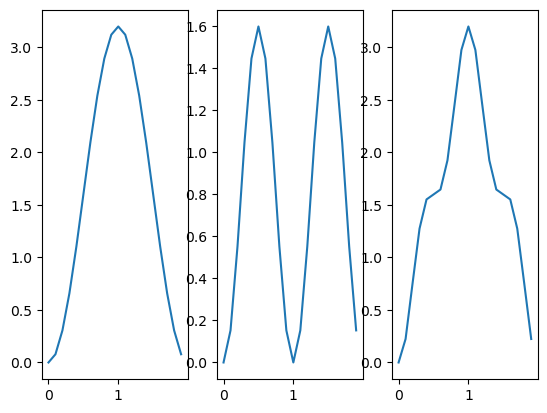

In [6]:
# Plot the dispersion
q1 = np.arange(0,2.,0.1)
e1 = [omeaga_q([0,0,q], J1=0.2, J2=0, D=0, s=1, FM=1) for q in q1]

q2 = np.arange(0,2.,0.1)
e2 = [omeaga_q([q,q,0], J1=0.2, J2=0, D=0, s=1, FM=1) for q in q2]

q3 = np.arange(0,2.,0.1)
e3 = [omeaga_q([q,q,q], J1=0.2, J2=0, D=0, s=1, FM=1) for q in q3]

fig, axs = plt.subplots(nrows=1,ncols=3)
axs[0].plot(q1, e1)
axs[1].plot(q2, e2)
axs[2].plot(q3, e3)
plt.show()

In [4]:
# Test a3 and a4 calculation: compare with Takin
# Takin tends to gives positive sth.
print(
    a3_a4_at_qe([1,1,1], a=4.95, kf=1.55, omega=0),
    a3_a4_at_qe([-1,-1,-1], a=4.95, kf=1.55, omega=0),
    a3_a4_at_qe([1,1,0], a=4.95, kf=1.55, omega=0),
    a3_a4_at_qe([-1,-1,0], a=4.95, kf=1.55, omega=0),
    a3_a4_at_qe([0,0,1], a=4.95, kf=1.55, omega=0),
    a3_a4_at_qe([0,0,-1], a=4.95, kf=1.55, omega=0),
    )
print(
    a3_a4_at_qe([1,1,1], a=4.95, kf=1.55, omega=1),
    a3_a4_at_qe([-1,-1,-1], a=4.95, kf=1.55, omega=1),
    a3_a4_at_qe([1,1,0], a=4.95, kf=1.55, omega=1),
    a3_a4_at_qe([-1,-1,0], a=4.95, kf=1.55, omega=1),
    a3_a4_at_qe([0,0,1], a=4.95, kf=1.55, omega=1),
    a3_a4_at_qe([0,0,-1], a=4.95, kf=1.55, omega=1),
    )

(9.906119790943016, 90.34101894739531) (-170.093880209057, 90.34101894739531) (35.3848681635875, 70.76973632717498) (-144.6151318364125, 70.76973632717498) (-65.82899420868712, 48.34201158262578) (114.17100579131288, 48.34201158262578)
(10.11683099919167, 85.0537624893696) (-169.88316900080835, 85.0537624893696) (37.41315602460105, 66.90785206006998) (-142.58684397539895, 66.90785206006998) (-60.95033470654884, 45.71713876408888) (119.04966529345117, 45.71713876408888)


## McStas constant Q scans

In [5]:
# Define parallel calling
my_env = os.environ.copy()
my_env["PATH"] = my_env["PATH"] + r";C:\mcstas-2.7.1\bin"

def para_tasks(cmd, cwd=r'D:\5_Instrument\Mira\Mira_Bender\Mira_McStas_Model/'):
    process = subprocess.run(cmd, 
                         env=my_env, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE, 
                         universal_newlines=True, cwd=cwd)
    return process.stderr, process.stdout

# test: single run
# process = subprocess.run(cmds[0], 
#                          env=my_env, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE, 
#                          universal_newlines=True, cwd=r'D:\5_Instrument\Mira\Mira_Bender\Mira_McStas_Model/')
# process.stderr, process.stdout

def simu_at_qe_around_magnon(Qs, path, folder, subfolder, q_info, dE=1.0, nE=21):
    '''
    McStas constant Q scan simulations and output data files in the subfolders of a folder with 
    naming the subfolder with the (Q,E) info.
    
    Parameters:
    Qs: nQ by 3 array, every row is a Q vector
    path: path of 'instr' files
    folder: folder storing the subfolders
    subfolder: folder name pattern to have correspinding (Q,E) info in the subfolder names
    q_info: array of values for naming subfolder to give Q info in thesubfolder names, having the same length of Qs
            (e_info will be calculated in the function)
    '''
    
    nQ = len(Qs)
    
    # calculate magnon energy at all Q points
    Es = np.array([omeaga_q(Q, J1=0.2, J2=0, D=0, s=1, FM=1) for Q in Qs])
    
    i = 0 # counting index: run parallelly four (cpu threads) simulations whenever there four commands prepared
    cmds = []
    
    for idx, (Q, E) in enumerate(zip(Qs,Es)):
        es = np.linspace(E-dE, E+dE, nE, endpoint=True) # energy reange points for scanning around the magnon energy
        
        for e in es: # do simulatoin at each e point
            a3, a4 = a3_a4_at_qe(Q, a=4.95, kf=1.55, omega=e) # calculate a3 and a4 for the (Q,e) point
            if np.isnan(a3) or np.isnan(a4):
                print('Warning: a3, a4 are NaN, skip current simulations with Q and E:', Q, E)
                continue

            f = folder + subfolder.format(q_info[idx], e).replace('.','p')
            cmds.append(r'mcrun MIRA_digital-twin{0:}.instr -d {1:} -n 1e6 kf=1.55 dE={2:} sth={3:} stt={4:}'.format(i, f,e,a3,a4))
            i += 1
            
            if i==4 or ((idx==nQ)&(e==es[-1])): # run parallelly four simulations and then clear up 'cmds'
                print(cmds)

                i = 0

                tic = time.time()
                
                with Parallel(n_jobs=4, prefer="threads") as parallel:
                    output = parallel(delayed(para_tasks)(cmd, path) for cmd in cmds)
                
                toc = time.time()
                elapse = toc - tic
                print('Running time: ', elapse, ' seconds')

                cmds = []

In [37]:
a3_a4_at_qe([0,2,2], a=4.95, kf=1.55, omega=1)

C:\Users\jhxup\AppData\Local\Temp\ipykernel_14144\4185928768.py:54: RuntimeWarning: invalid value encountered in arccos
  theta_q_mki_required = rad2deg * np.arccos((ki**2 + q**2 -kf**2)/(2*q*ki))
C:\Users\jhxup\AppData\Local\Temp\ipykernel_14144\4185928768.py:58: RuntimeWarning: invalid value encountered in arccos
  a4 = rad2deg * np.arccos((ki**2 + kf**2 -q**2)/(2*ki*kf))


(nan, nan)

In [ ]:
# Without using the defined function

folder  = r'D:\5_Instrument\Mira\Mira_Bender\Mira_McStas_Model\magnon_bcc_constantQscans'
subfolder = r'\Qhh0_h{:1.2f}_e{:1.3f}meV'
path = r'D:\5_Instrument\Mira\Mira_Bender\Mira_McStas_Model'

Qs = np.linspace(1.0, 2.0, 11, endpoint=True)
Es = np.array([omeaga_q([q,q,0], J1=0.2, J2=0, D=0, s=1, FM=1) for q in Qs])

i = 0
cmds = []
for Q, E in zip(Qs,Es):
    es = np.linspace(E-1.0, E+1.0, 21, endpoint=True)
    for e in es:
        a3, a4 = a3_a4_at_qe([Q,Q,0], a=4.95, kf=1.55, omega=e)

        f = folder + subfolder.format(Q,e).replace('.','p')
        cmds.append(r'mcrun -c MIRA_digital-twin{0:}.instr -d {1:} -n 1e6 kf=1.55 dE={2:} sth={3:} stt={4:}'.format(i, f,e,a3,a4))
        i += 1
        if i==4:
            print(cmds)

            i =0

            tic = time.time()
            with Parallel(n_jobs=4, prefer="threads") as parallel:
                    output = parallel(delayed(para_tasks)(cmd, path) for cmd in cmds)
            toc = time.time()
            elapse = toc - tic
            print(elapse)

            cmds = []

In [14]:
# Using defined functions
#qs = np.linspace(1.0, 2.0, 11, endpoint=True) # a lot of invalid parameter for the simulation (triangle does not close!)
qs = np.linspace(0.1, 1.0, 10, endpoint=True)

Q00h = np.vstack([np.zeros([2,10]), qs]).T
Qhh0 = np.vstack([np.tile(qs,(2,1)), np.zeros_like(qs)]).T
Qhhh = np.tile(qs,(3,1)).T

Qs = [Q00h, Qhh0, Qhhh]
folder  = r'D:\5_Instrument\Mira\Mira_Bender\Mira_McStas_Model\magnon_bcc_constantQscans'
subfolders = [r'\Q00h_h{:1.2f}_e{:1.3f}meV', r'\Qhh0_h{:1.2f}_e{:1.3f}meV', r'\Qhhh_h{:1.2f}_e{:1.3f}meV']
path = r'D:\5_Instrument\Mira\Mira_Bender\Mira_McStas_Model'

simu_at_qe_around_magnon(Qs=Qs[0], path=path, folder=folder, subfolder=subfolders[0], q_info=qs)
#simu_at_qe_around_magnon(Qs=Qs[1], path=path, folder=folder, subfolder=subfolders[1], q_info=qs)
#simu_at_qe_around_magnon(Qs=Qs[2], path=path, folder=folder, subfolder=subfolders[2], q_info=qs)

C:\Users\jhxup\AppData\Local\Temp\ipykernel_18436\3992911345.py:61: RuntimeWarning: invalid value encountered in arccos
  theta_q_mki_required = rad2deg * np.arccos((ki**2 + q**2 -kf**2)/(2*q*ki))
C:\Users\jhxup\AppData\Local\Temp\ipykernel_18436\3992911345.py:64: RuntimeWarning: invalid value encountered in arccos
  a4 = rad2deg * np.arccos((ki**2 + kf**2 -q**2)/(2*ki*kf))


['mcrun MIRA_digital-twin0.instr -d D:\\5_Instrument\\Mira\\Mira_Bender\\Mira_McStas_Model\\magnon_bcc_constantQscans\\Q00h_h0p10_e-0p722meV -n 1e6 kf=1.55 dE=-0.7216904260722456 sth=-155.91365058369485 stt=1.9152562220921159', 'mcrun MIRA_digital-twin1.instr -d D:\\5_Instrument\\Mira\\Mira_Bender\\Mira_McStas_Model\\magnon_bcc_constantQscans\\Q00h_h0p10_e-0p622meV -n 1e6 kf=1.55 dE=-0.6216904260722456 sth=-140.4698021514864 stt=2.9877929583578156', 'mcrun MIRA_digital-twin2.instr -d D:\\5_Instrument\\Mira\\Mira_Bender\\Mira_McStas_Model\\magnon_bcc_constantQscans\\Q00h_h0p10_e-0p522meV -n 1e6 kf=1.55 dE=-0.5216904260722456 sth=-129.2690111797089 stt=3.634966541430085', 'mcrun MIRA_digital-twin3.instr -d D:\\5_Instrument\\Mira\\Mira_Bender\\Mira_McStas_Model\\magnon_bcc_constantQscans\\Q00h_h0p10_e-0p422meV -n 1e6 kf=1.55 dE=-0.4216904260722456 sth=-119.85349144224276 stt=4.072877212747578']
Running time:  0.6003072261810303  seconds
['mcrun MIRA_digital-twin0.instr -d D:\\5_Instrument